# AI in MARKETING and BUSINESS

## 1. UNDERSTAND THE PROBLEM 

- Marketing is very important in all business.
- We must understant the customers and their behavior.
- If we have data about our customers, through DataScience we are able to do some study of the market, and improve or business.

- Our goal is to create a marketing campaign focused on our customers, dividing them in at least, 3 different segments.

## 2. IMPORT LIBRARIES AND DATASETS (and observe the Data)

We must understand the data:
- ORDERNUMBER: nº order
- QUANTITYORDERED: nº purchased items
- PRICEEACH: item's price
- ORDERDATE: date of the order
- STATUS: order's status
- QTR_ID: order's quarter 
- MONTH_ID: month of the order
- YEAR_ID: year of the order
- PRODUCTLINE: kind of item/product
- CUSTOMERNAME: name of the customer
- PHONE: nº phone of customer
- ADRESSLINE1
- ADRESSLINE2
- CITY
- STATE
- POSTALCODE
- COUNTRY
- TERRITORY
- DEALSIZE
- CONTACTFIRST NAME
- CONTACTLAST NAME

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2 #for img
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [57]:
sales_df = pd.read_csv('sales_data_sample.csv', encoding = 'unicode_escape')

In [58]:
sales_df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped       1         2     2003  ...   
1       5/7/2003 0:00   Shipped       2         5     2003  ...   
2       7/1/2003 0:00   Shipped       3         7     2003  ...   
3      8/25/2003 0:00   Shipped       3         8     2003  ...   
4     10/10/2003 0:00   Shipped       4        10     2003  ...   
...               ...       ...     ...       ...      ...  ...   
2818   12/2/2004 0:00   Shipped       4        12     2004  ...   
2819   1/31/2005 0:00   Shipped       1         1     2005  ...   
2820    3/1/2005 0:00  Resolved       1         3     2005  ...   
2821   3/28/2005 0:00   Shipped       1         3     2005  ...   
2822    5/6/2005 0:00   On Hold       2         5     2005  ...   

                       ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0           897 Long Airport Avenue           NaN            NYC    NY   
1                59 rue de l'Abbaye           NaN          Reims   NaN   
2     27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3                78934 Hillside Dr.           NaN       Pasadena    CA   
4                   7734 Strong St.           NaN  San Francisco    CA   
...                             ...           ...            ...   ...   
2818             C/ Moralzarzal, 86           NaN         Madrid   NaN   
2819                    Torikatu 38           NaN           Oulu   NaN   
2820             C/ Moralzarzal, 86           NaN         Madrid   NaN   
2821          1 rue Alsace-Lorraine           NaN       Toulouse   NaN   
2822             8616 Spinnaker Dr.           NaN         Boston    MA   

     POSTALCODE  COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0         10022      USA       NaN              Yu             Kwai    Small  
1         51100   France      EMEA         Henriot             Paul    Small  
2         75508   France      EMEA        Da Cunha           Daniel   Medium  
3         90003      USA       NaN           Young            Julie   Medium  
4           NaN      USA       NaN           Brown            Julie   Medium  
...         ...      ...       ...             ...              ...      ...  
2818      28034    Spain      EMEA          Freyre            Diego    Small  
2819      90110  Finland      EMEA       Koskitalo           Pirkko   Medium  
2820      28034    Spain      EMEA          Freyre            Diego   Medium  
2821      31000   France      EMEA          Roulet          Annette    Small  
2822      51003      USA       NaN         Yoshido             Juri   Medium  

[2823 rows x 25 columns]

In [59]:
sales_df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [60]:
# To convert the date of the order to date-time format
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])

# To check de data-type
sales_df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [61]:
# To check the number of non-null elements of the dataframe
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [62]:
# To check the number of Null elements of the dataframe
sales_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [63]:
# We are going to drop the Rows with NULL elements, and the NON-INFO elements of the dataframe (like Contact-name, 
# postalcode, etc.)

df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
sales_df = sales_df.drop(df_drop, axis = 1)
sales_df.head()

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE   STATUS  \
0               30      95.70                2  2871.00 2003-02-24  Shipped   
1               34      81.35                5  2765.90 2003-05-07  Shipped   
2               41      94.74                2  3884.34 2003-07-01  Shipped   
3               45      83.26                6  3746.70 2003-08-25  Shipped   
4               49     100.00               14  5205.27 2003-10-10  Shipped   

   QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP PRODUCTCODE COUNTRY DEALSIZE  
0       1         2     2003  Motorcycles    95    S10_1678     USA    Small  
1       2         5     2003  Motorcycles    95    S10_1678  France    Small  
2       3         7     2003  Motorcycles    95    S10_1678  France   Medium  
3       3         8     2003  Motorcycles    95    S10_1678     USA   Medium  
4       4        10     2003  Motorcycles    95    S10_1678     USA   Medium

In [64]:
sales_df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [65]:
# To get the unique observation of each column => nº of unique observations
sales_df.nunique()

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

We can observe that there are more unique observations in ProductCode than Country. 
So we are going to treat these columns in a different way for each other.

## 3. EDA and CLEANING of DATA (Part 1)

In [66]:
sales_df['COUNTRY'].value_counts().index

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object')

In [67]:
# Creating a Function for X(= name of the column) for the visualization the nº of elements in a column.

def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = sales_df[x].value_counts().index, y = sales_df[x].value_counts(), color = sales_df[x].value_counts().index, height = 600)
  fig.show()

In [68]:
barplot_visualization('COUNTRY')

In [69]:
barplot_visualization('STATUS')

In [70]:
# We have realized (trough the previous plot), that there's no equilibrium in the STATUS column
# So, this STATUS column can not give us relevant information, so we drop the STATUS column

sales_df.drop(columns = ['STATUS'], inplace = True)
sales_df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE  QTR_ID  \
0                  30      95.70                2  2871.00 2003-02-24       1   
1                  34      81.35                5  2765.90 2003-05-07       2   
2                  41      94.74                2  3884.34 2003-07-01       3   
3                  45      83.26                6  3746.70 2003-08-25       3   
4                  49     100.00               14  5205.27 2003-10-10       4   
...               ...        ...              ...      ...        ...     ...   
2818               20     100.00               15  2244.40 2004-12-02       4   
2819               29     100.00                1  3978.51 2005-01-31       1   
2820               43     100.00                4  5417.57 2005-03-01       1   
2821               34      62.24                1  2116.16 2005-03-28       1   
2822               47      65.52                9  3079.44 2005-05-06       2   

      MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP PRODUCTCODE  COUNTRY DEALSIZE  
0            2     2003  Motorcycles    95    S10_1678      USA    Small  
1            5     2003  Motorcycles    95    S10_1678   France    Small  
2            7     2003  Motorcycles    95    S10_1678   France   Medium  
3            8     2003  Motorcycles    95    S10_1678      USA   Medium  
4           10     2003  Motorcycles    95    S10_1678      USA   Medium  
...        ...      ...          ...   ...         ...      ...      ...  
2818        12     2004        Ships    54    S72_3212    Spain    Small  
2819         1     2005        Ships    54    S72_3212  Finland   Medium  
2820         3     2005        Ships    54    S72_3212    Spain   Medium  
2821         3     2005        Ships    54    S72_3212   France    Small  
2822         5     2005        Ships    54    S72_3212      USA   Medium  

[2823 rows x 13 columns]

In [71]:
barplot_visualization('PRODUCTLINE')

In [72]:
barplot_visualization('DEALSIZE')

Now we should do a treatment to our COLUMNS of interest. So, we create a function to convert the CATEGORIC labels to NUMERIC labels (becouse the Machine Learning algorithms do not understand strings, they just understand numbers.

In [73]:
def dummies(x):
  dummy = pd.get_dummies(sales_df[x])
  sales_df.drop(columns = x , inplace = True)
  return pd.concat([sales_df, dummy], axis = 1)

In [74]:
# We obtain through the function => a NUMERIC label for "COUNTRY" column.

sales_df = dummies('COUNTRY')
sales_df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE  QTR_ID  \
0                  30      95.70                2  2871.00 2003-02-24       1   
1                  34      81.35                5  2765.90 2003-05-07       2   
2                  41      94.74                2  3884.34 2003-07-01       3   
3                  45      83.26                6  3746.70 2003-08-25       3   
4                  49     100.00               14  5205.27 2003-10-10       4   
...               ...        ...              ...      ...        ...     ...   
2818               20     100.00               15  2244.40 2004-12-02       4   
2819               29     100.00                1  3978.51 2005-01-31       1   
2820               43     100.00                4  5417.57 2005-03-01       1   
2821               34      62.24                1  2116.16 2005-03-28       1   
2822               47      65.52                9  3079.44 2005-05-06       2   

      MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  ... Italy Japan  Norway  \
0            2     2003  Motorcycles    95  ...     0     0       0   
1            5     2003  Motorcycles    95  ...     0     0       0   
2            7     2003  Motorcycles    95  ...     0     0       0   
3            8     2003  Motorcycles    95  ...     0     0       0   
4           10     2003  Motorcycles    95  ...     0     0       0   
...        ...      ...          ...   ...  ...   ...   ...     ...   
2818        12     2004        Ships    54  ...     0     0       0   
2819         1     2005        Ships    54  ...     0     0       0   
2820         3     2005        Ships    54  ...     0     0       0   
2821         3     2005        Ships    54  ...     0     0       0   
2822         5     2005        Ships    54  ...     0     0       0   

      Philippines  Singapore  Spain  Sweden  Switzerland  UK  USA  
0               0          0      0       0            0   0    1  
1               0          0      0       0            0   0    0  
2               0          0      0       0            0   0    0  
3               0          0      0       0            0   0    1  
4               0          0      0       0            0   0    1  
...           ...        ...    ...     ...          ...  ..  ...  
2818            0          0      1       0            0   0    0  
2819            0          0      0       0            0   0    0  
2820            0          0      1       0            0   0    0  
2821            0          0      0       0            0   0    0  
2822            0          0      0       0            0   0    1  

[2823 rows x 31 columns]

In [75]:
sales_df = dummies('PRODUCTLINE')

In [76]:
sales_df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE  QTR_ID  \
0                  30      95.70                2  2871.00 2003-02-24       1   
1                  34      81.35                5  2765.90 2003-05-07       2   
2                  41      94.74                2  3884.34 2003-07-01       3   
3                  45      83.26                6  3746.70 2003-08-25       3   
4                  49     100.00               14  5205.27 2003-10-10       4   
...               ...        ...              ...      ...        ...     ...   
2818               20     100.00               15  2244.40 2004-12-02       4   
2819               29     100.00                1  3978.51 2005-01-31       1   
2820               43     100.00                4  5417.57 2005-03-01       1   
2821               34      62.24                1  2116.16 2005-03-28       1   
2822               47      65.52                9  3079.44 2005-05-06       2   

      MONTH_ID  YEAR_ID  MSRP PRODUCTCODE  ... Switzerland  UK  USA  \
0            2     2003    95    S10_1678  ...           0   0    1   
1            5     2003    95    S10_1678  ...           0   0    0   
2            7     2003    95    S10_1678  ...           0   0    0   
3            8     2003    95    S10_1678  ...           0   0    1   
4           10     2003    95    S10_1678  ...           0   0    1   
...        ...      ...   ...         ...  ...         ...  ..  ...   
2818        12     2004    54    S72_3212  ...           0   0    0   
2819         1     2005    54    S72_3212  ...           0   0    0   
2820         3     2005    54    S72_3212  ...           0   0    0   
2821         3     2005    54    S72_3212  ...           0   0    0   
2822         5     2005    54    S72_3212  ...           0   0    1   

      Classic Cars  Motorcycles  Planes  Ships  Trains  Trucks and Buses  \
0                0            1       0      0       0                 0   
1                0            1       0      0       0                 0   
2                0            1       0      0       0                 0   
3                0            1       0      0       0                 0   
4                0            1       0      0       0                 0   
...            ...          ...     ...    ...     ...               ...   
2818             0            0       0      1       0                 0   
2819             0            0       0      1       0                 0   
2820             0            0       0      1       0                 0   
2821             0            0       0      1       0                 0   
2822             0            0       0      1       0                 0   

      Vintage Cars  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
2818             0  
2819             0  
2820             0  
2821             0  
2822             0  

[2823 rows x 37 columns]

In [77]:
sales_df = dummies('DEALSIZE')
sales_df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE  QTR_ID  \
0                  30      95.70                2  2871.00 2003-02-24       1   
1                  34      81.35                5  2765.90 2003-05-07       2   
2                  41      94.74                2  3884.34 2003-07-01       3   
3                  45      83.26                6  3746.70 2003-08-25       3   
4                  49     100.00               14  5205.27 2003-10-10       4   
...               ...        ...              ...      ...        ...     ...   
2818               20     100.00               15  2244.40 2004-12-02       4   
2819               29     100.00                1  3978.51 2005-01-31       1   
2820               43     100.00                4  5417.57 2005-03-01       1   
2821               34      62.24                1  2116.16 2005-03-28       1   
2822               47      65.52                9  3079.44 2005-05-06       2   

      MONTH_ID  YEAR_ID  MSRP PRODUCTCODE  ...  Classic Cars  Motorcycles  \
0            2     2003    95    S10_1678  ...             0            1   
1            5     2003    95    S10_1678  ...             0            1   
2            7     2003    95    S10_1678  ...             0            1   
3            8     2003    95    S10_1678  ...             0            1   
4           10     2003    95    S10_1678  ...             0            1   
...        ...      ...   ...         ...  ...           ...          ...   
2818        12     2004    54    S72_3212  ...             0            0   
2819         1     2005    54    S72_3212  ...             0            0   
2820         3     2005    54    S72_3212  ...             0            0   
2821         3     2005    54    S72_3212  ...             0            0   
2822         5     2005    54    S72_3212  ...             0            0   

      Planes  Ships  Trains  Trucks and Buses  Vintage Cars  Large  Medium  \
0          0      0       0                 0             0      0       0   
1          0      0       0                 0             0      0       0   
2          0      0       0                 0             0      0       1   
3          0      0       0                 0             0      0       1   
4          0      0       0                 0             0      0       1   
...      ...    ...     ...               ...           ...    ...     ...   
2818       0      1       0                 0             0      0       0   
2819       0      1       0                 0             0      0       1   
2820       0      1       0                 0             0      0       1   
2821       0      1       0                 0             0      0       0   
2822       0      1       0                 0             0      0       1   

      Small  
0         1  
1         1  
2         0  
3         0  
4         0  
...     ...  
2818      1  
2819      0  
2820      0  
2821      1  
2822      0  

[2823 rows x 39 columns]

In [78]:
y = pd.Categorical(sales_df['PRODUCTCODE'])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962', 'S700_4002', 'S72_1253', 'S72_3212']

In [79]:
y = pd.Categorical(sales_df['PRODUCTCODE']).codes
y

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [80]:
sales_df['PRODUCTCODE'] = pd.Categorical(sales_df['PRODUCTCODE']).codes

In [81]:
sales_df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE  QTR_ID  \
0                  30      95.70                2  2871.00 2003-02-24       1   
1                  34      81.35                5  2765.90 2003-05-07       2   
2                  41      94.74                2  3884.34 2003-07-01       3   
3                  45      83.26                6  3746.70 2003-08-25       3   
4                  49     100.00               14  5205.27 2003-10-10       4   
...               ...        ...              ...      ...        ...     ...   
2818               20     100.00               15  2244.40 2004-12-02       4   
2819               29     100.00                1  3978.51 2005-01-31       1   
2820               43     100.00                4  5417.57 2005-03-01       1   
2821               34      62.24                1  2116.16 2005-03-28       1   
2822               47      65.52                9  3079.44 2005-05-06       2   

      MONTH_ID  YEAR_ID  MSRP  PRODUCTCODE  ...  Classic Cars  Motorcycles  \
0            2     2003    95            0  ...             0            1   
1            5     2003    95            0  ...             0            1   
2            7     2003    95            0  ...             0            1   
3            8     2003    95            0  ...             0            1   
4           10     2003    95            0  ...             0            1   
...        ...      ...   ...          ...  ...           ...          ...   
2818        12     2004    54          108  ...             0            0   
2819         1     2005    54          108  ...             0            0   
2820         3     2005    54          108  ...             0            0   
2821         3     2005    54          108  ...             0            0   
2822         5     2005    54          108  ...             0            0   

      Planes  Ships  Trains  Trucks and Buses  Vintage Cars  Large  Medium  \
0          0      0       0                 0             0      0       0   
1          0      0       0                 0             0      0       0   
2          0      0       0                 0             0      0       1   
3          0      0       0                 0             0      0       1   
4          0      0       0                 0             0      0       1   
...      ...    ...     ...               ...           ...    ...     ...   
2818       0      1       0                 0             0      0       0   
2819       0      1       0                 0             0      0       1   
2820       0      1       0                 0             0      0       1   
2821       0      1       0                 0             0      0       0   
2822       0      1       0                 0             0      0       1   

      Small  
0         1  
1         1  
2         0  
3         0  
4         0  
...     ...  
2818      1  
2819      0  
2820      0  
2821      1  
2822      0  

[2823 rows x 39 columns]

## 4. EDA (Part 2)

In [82]:
# Now we group the Data according to the Date of the Order.

sales_df_group = sales_df.groupby(by = "ORDERDATE").sum()
sales_df_group

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  QTR_ID  \
ORDERDATE                                                                   
2003-01-06              151     288.78               10  12133.25       4   
2003-01-09              142     284.96               10  11432.34       4   
2003-01-10               80     150.14                3   6864.05       2   
2003-01-29              541    1417.54              136  54702.00      16   
2003-01-31              443    1061.89               91  44621.96      13   
...                     ...        ...              ...       ...     ...   
2005-05-13              259     561.18               21  31821.90      12   
2005-05-17              509    1269.43              105  59475.10      28   
2005-05-29              607    1148.40               94  51233.18      30   
2005-05-30              187     542.16               18  14578.75      14   
2005-05-31              696    1561.40              112  78918.03      38   

            MONTH_ID  YEAR_ID  MSRP  PRODUCTCODE  Australia  ...  \
ORDERDATE                                                    ...   
2003-01-06         4     8012   363          174          0  ...   
2003-01-09         4     8012   372          181          0  ...   
2003-01-10         2     4006   155           37          0  ...   
2003-01-29        16    32048  1695          723          0  ...   
2003-01-31        13    26039  1365          720          0  ...   
...              ...      ...   ...          ...        ...  ...   
2005-05-13        30    12030   728          101          0  ...   
2005-05-17        70    28070  1669          462          0  ...   
2005-05-29        75    30075  1328          797         13  ...   
2005-05-30        35    14035   618          265          0  ...   
2005-05-31        95    38095  2065          899          0  ...   

            Classic Cars  Motorcycles  Planes  Ships  Trains  \
ORDERDATE                                                      
2003-01-06             0            0       0      0       0   
2003-01-09             0            0       0      0       0   
2003-01-10             0            0       0      0       0   
2003-01-29             3            0       0      0       0   
2003-01-31             7            0       0      0       2   
...                  ...          ...     ...    ...     ...   
2005-05-13             0            6       0      0       0   
2005-05-17            14            0       0      0       0   
2005-05-29             7            0       0      0       0   
2005-05-30             0            0       0      0       0   
2005-05-31             7            0       0      0       0   

            Trucks and Buses  Vintage Cars  Large  Medium  Small  
ORDERDATE                                                         
2003-01-06                 0             4      0       2      2  
2003-01-09                 0             4      0       2      2  
2003-01-10                 0             2      0       1      1  
2003-01-29                 7             6      0      10      6  
2003-01-31                 4             0      0       8      5  
...                      ...           ...    ...     ...    ...  
2005-05-13                 0             0      2       3      1  
2005-05-17                 0             0      2       8      4  
2005-05-29                 0             8      0       8      7  
2005-05-30                 0             7      0       1      6  
2005-05-31                11             1      3       9      7  

[252 rows x 38 columns]

In [83]:
# To know when (month) the maximum of sales are...

fig = px.line(x = sales_df_group.index, y = sales_df_group.SALES, title = 'Sales')
fig.show()

In [84]:
# We can thought that "Black Friday" has an impact on the maximum of sales.

In [85]:
# Now we don't need the "ORDERDATE"...so we drop it from the first Dataframe 
# (becouse we don't do a Forecasting, we are going to do a Clustering)

sales_df.drop("ORDERDATE", axis = 1, inplace = True)
sales_df.shape

(2823, 38)

Now we are going to study the correlation of the labels.

<Axes: >

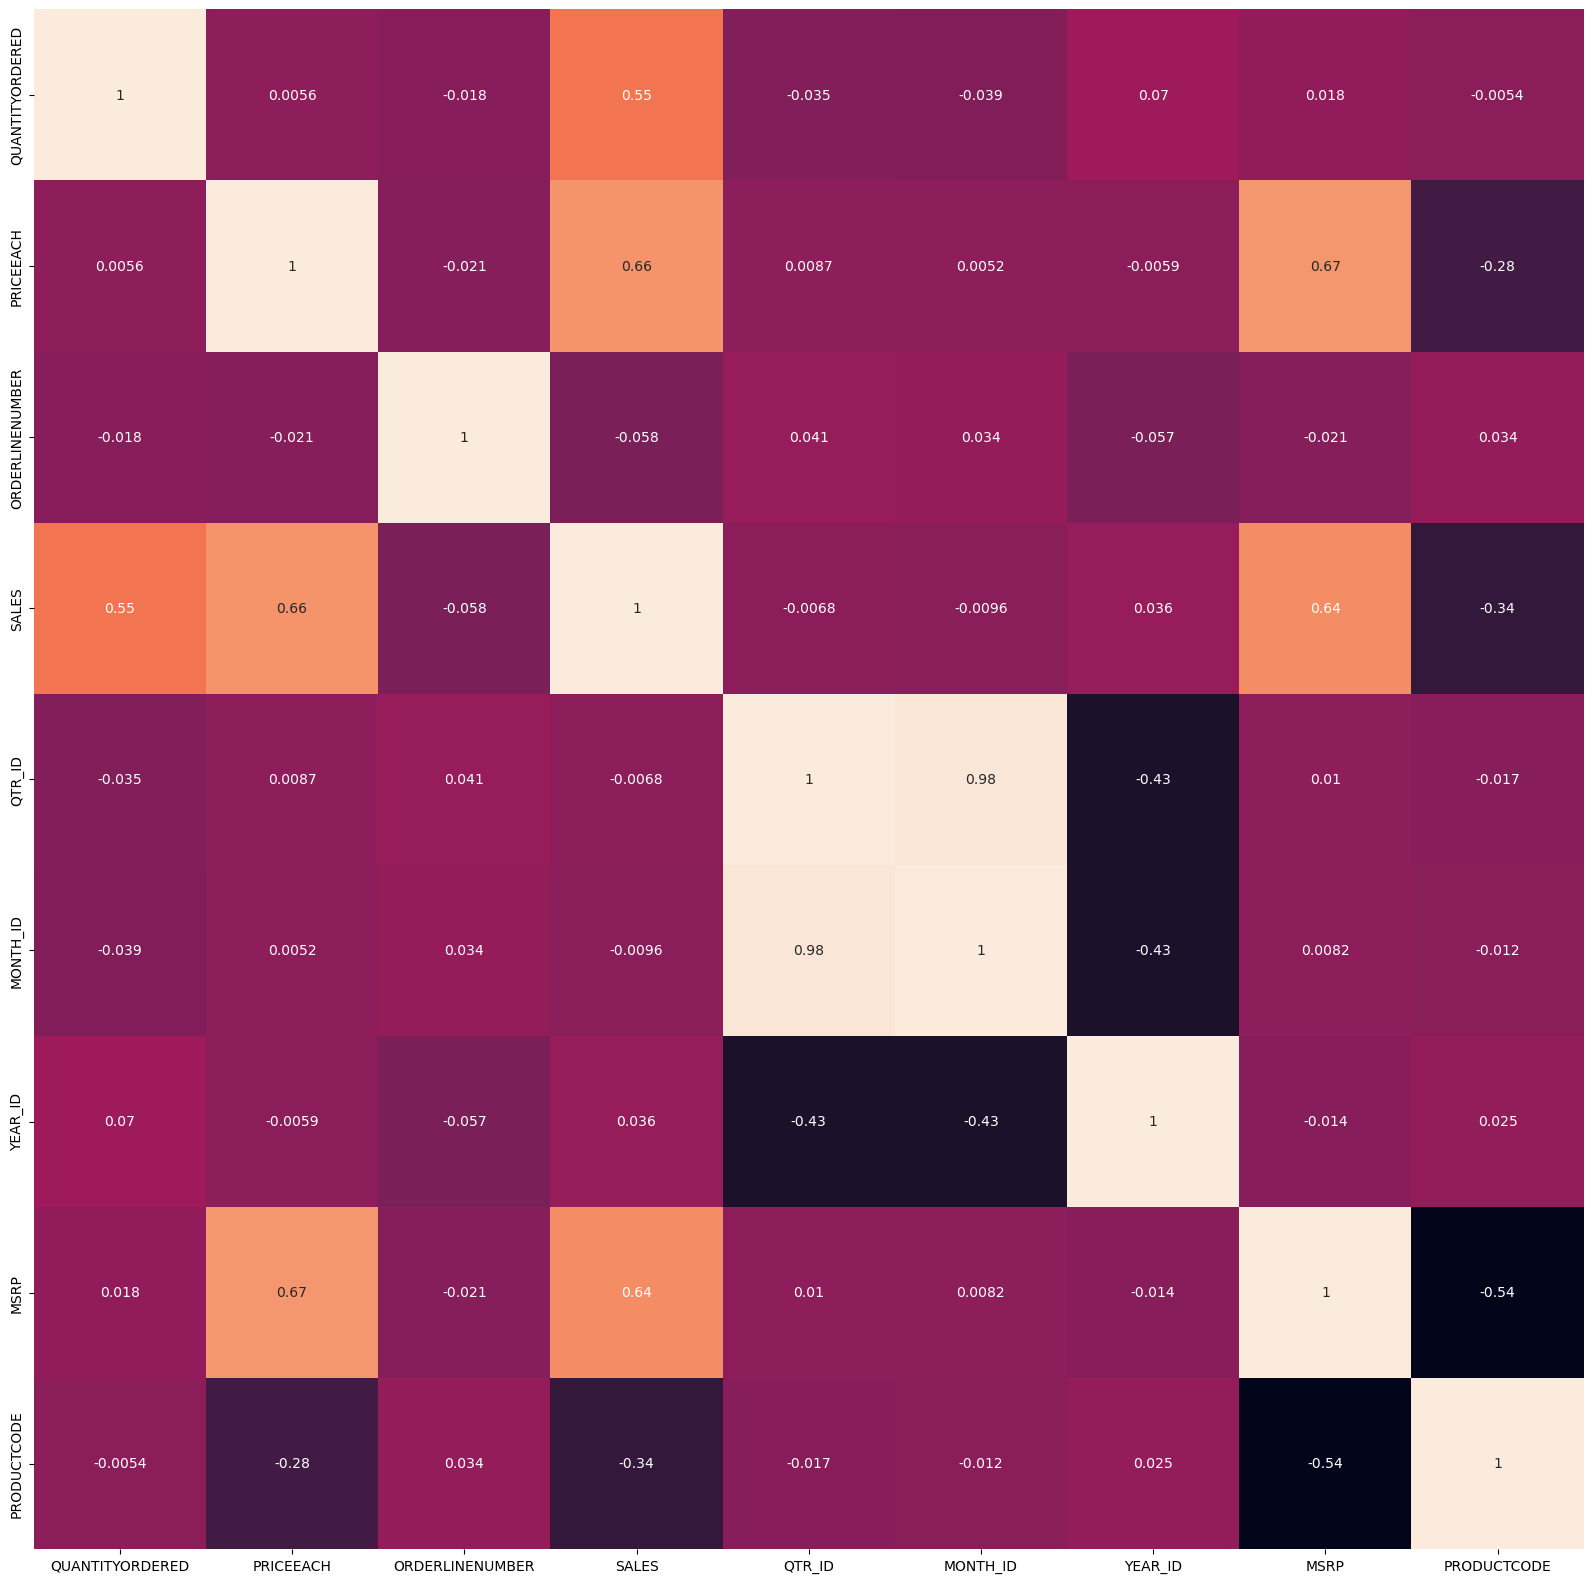

In [86]:
plt.figure(figsize = (20, 20))
corr_matrix = sales_df.iloc[:, :9].corr() # we don't include the DUMMIES
sns.heatmap(corr_matrix, annot = True, cbar = False)

In [87]:
# It seems that the quarter ID and month IDs are highly correlated. We are going to drop the quarter's ID.
sales_df.drop("QTR_ID", axis = 1, inplace = True)
sales_df.shape

(2823, 37)

In [89]:
# We are going to represent distributions with:
# (1) Histogram (2) Density => kde plot (3) rug plot

import plotly.figure_factory as ff

plt.figure(figsize = (10, 10))

for i in range(8):
  if sales_df.columns[i] != 'ORDERLINENUMBER':
    col_name = sales_df.columns[i]
    fig = ff.create_distplot([sales_df[col_name].apply(lambda x: float(x))], ['distplot'])
    fig.update_layout(title_text = col_name)
    fig.show()

<Figure size 1000x1000 with 0 Axes>

In [91]:
# Visualize the relationship between variables using plots
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(sales_df,
    dimensions = sales_df.columns[:8], color = 'MONTH_ID')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



<Figure size 1500x1500 with 0 Axes>

In [92]:
# We can observe that there's a trend between: 
# 'SALES' and 'QUANTITYORDER'
# 'MSRP' and 'PRICEEACH'
# 'PRICEEACH' and 'SALES'
# It seems that sales growth is noticeable as we go from 2013 to 2014 and 2015 ('SALES' Vs 'YEAR_ID')
# If we zoom in on 'SALES' and 'QUANTITY ORDERED', you can see the color-coded monthly information on the graph

## 5. UNDERSTAND THE THEORY BEHIND OF CLUSTERING => K-MEANS

K-Means clustering is a popular and simple unsupervised machine learning algorithm used for partitioning a dataset into a set of distinct, non-overlapping groups known as clusters. The goal is to organize data points into clusters in such a way that points within the same cluster are more similar to each other than to points in other clusters.

How it Works:
1. **Initialization:** The process starts by selecting 'k' initial centroids, where 'k' is a predefined number of clusters. The initial centroids can be chosen randomly or by using more sophisticated methods.
2. **Assignment:** Each data point is assigned to the nearest centroid, and this forms k clusters.
3. **Update:** The centroids of the clusters are recalculated by taking the mean of all points assigned to each cluster.
4. **Iteration:** Steps 2 and 3 are repeated until the centroids no longer move significantly, indicating that the algorithm has converged.

Key Features:
- **Simplicity and Efficiency:** K-Means is straightforward to implement and computationally efficient, making it suitable for a wide range of clustering tasks.
- **Applicability:** It can be used for cluster analysis in marketing, computer vision, geo-statistics, and many other fields.
- **Sensitivity to Initial Centroids:** The algorithm's performance can be significantly influenced by the initial choice of centroids. Multiple runs with different initializations may be necessary to achieve a good clustering.
- **Assumptions:** K-Means assumes that clusters are spherical and evenly sized, which may not always be the case in real-world data.

Limitations:
- It requires the number of clusters to be specified in advance.
- It may converge to a local optimum depending on the initial centroid placement.
- It is not well-suited for clustering non-spherical groups or clusters of different sizes and densities.

Despite its limitations, K-Means remains a widely used technique for exploratory data analysis due to its simplicity and efficiency in finding patterns and structures in data.

## 6. FIND THE OPTIMAL NUMBER OF CLUSTERS USING THE ELBOW METHOD

In [93]:
# We scale the data
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)

In [94]:
sales_df_scaled.shape

(2823, 37)

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ramonestadella/anaconda3/lib/python3.

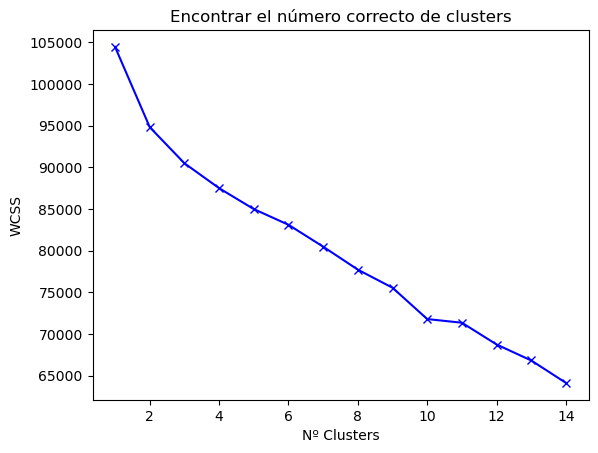

In [95]:
scores = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(sales_df_scaled)
  scores.append(kmeans.inertia_) # la inercia es la suma de los cuadrados de las distancias de las observaciones al centro del cluster más cercano

plt.plot(range_values, scores, 'bx-')
plt.title('Encontrar el número correcto de clusters')
plt.xlabel('Nº Clusters')
plt.ylabel('WCSS')
plt.show()


We get information through the plot => we want 5 nº of clusters

## 7. We apply the K-MEANS (Clustering) algorithm

In [96]:
# We group the data through k-means
kmeans = KMeans(5)
kmeans.fit(sales_df_scaled)
labels = kmeans.labels_

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [97]:
labels

array([3, 3, 0, ..., 1, 1, 1], dtype=int32)

In [98]:
kmeans.cluster_centers_.shape

(5, 37)

In [100]:
# We should take a look at the cluster centers
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])
cluster_centers

QUANTITYORDERED PRICEEACH ORDERLINENUMBER     SALES  MONTH_ID   YEAR_ID  \
0        0.280060  0.592231       -0.022135  0.477980  0.011415 -0.025237   
1       -0.037171  0.009763        0.078809 -0.271913 -0.043991  0.001642   
2        1.245428  0.800220       -0.259579  2.573861 -0.088008  0.136857   
3       -0.458757 -0.778205        0.034816 -0.826174  0.013083  0.001463   
4       -0.147417  0.000855        0.055457 -0.135704 -0.014718  0.029531   

       MSRP PRODUCTCODE Australia   Austria  ... Classic Cars Motorcycles  \
0  0.417043   -0.259356 -0.264819  0.038372  ...     0.142686    0.026078   
1 -0.363043    1.126176 -0.230280 -0.017283  ...    -0.721812   -0.364452   
2  1.430265   -0.871802 -0.084647  0.043374  ...     0.580097    0.011712   
3 -0.593995    0.206479 -0.264819 -0.017518  ...    -0.106626    0.050970   
4 -0.004222   -0.198267  3.170998 -0.140961  ...     0.112930   -0.004069   

     Planes     Ships    Trains Trucks and Buses Vintage Cars     Large  \
0 -0.027005 -0.300637 -0.031026         0.108694    -0.032398 -0.242672   
1 -0.348674  3.326275 -0.167454        -0.345470    -0.523371 -0.242672   
2 -0.164278 -0.300637 -0.128350        -0.201008    -0.151285  4.120788   
3  0.123920 -0.300637  0.117687        -0.004571     0.148015 -0.242672   
4  0.039815 -0.300637 -0.137796        -0.048072     0.135119 -0.242672   

     Medium     Small  
0  1.019676 -0.912100  
1 -0.066000  0.177967  
2 -0.980703 -0.912100  
3 -0.980703  1.096370  
4  0.053309  0.058175  

[5 rows x 37 columns]

In [101]:
# To understand what these numbers mean, let's perform an inverse transformation

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers

QUANTITYORDERED  PRICEEACH ORDERLINENUMBER        SALES  MONTH_ID  \
0       37.820513  95.604265        6.372650  4434.106983  7.134188   
1       34.730769  83.855470        6.799145  3053.150128  6.931624   
2       47.222930  99.799554        5.369427  8293.753248  6.770701   
3       30.624645  67.961592        6.613270  2032.457280  7.140284   
4       33.657005  83.675797        6.700483  3303.984831  7.038647   

       YEAR_ID        MSRP PRODUCTCODE     Australia       Austria  ...  \
0  2003.797436  117.472650   45.582906 -4.163336e-17  2.478632e-02  ...   
1  2003.816239   86.128205   89.337607  8.547009e-03  1.709402e-02  ...   
2  2003.910828  158.184713   26.242038  4.458599e-02  2.547771e-02  ...   
3  2003.816114   76.848341   60.293839 -5.551115e-17  1.706161e-02  ...   
4  2003.835749  100.545894   47.512077  8.502415e-01  3.469447e-18  ...   

   Classic Cars   Motorcycles        Planes         Ships        Trains  \
0  4.102564e-01  1.256410e-01  1.000000e-01  5.412337e-16  2.222222e-02   
1  9.436896e-16  2.775558e-17  2.498002e-16  1.000000e+00 -8.673617e-17   
2  6.178344e-01  1.210191e-01  5.732484e-02 -5.551115e-17  6.369427e-03   
3  2.919431e-01  1.336493e-01  1.469194e-01  4.163336e-16  4.644550e-02   
4  3.961353e-01  1.159420e-01  1.207729e-01 -4.163336e-17  4.830918e-03   

  Trucks and Buses  Vintage Cars         Large        Medium         Small  
0     1.401709e-01  2.017094e-01  1.318390e-16  1.000000e+00  1.332268e-15  
1     2.636780e-16  3.608225e-16 -1.179612e-16  4.572650e-01  5.427350e-01  
2     4.458599e-02  1.528662e-01  1.000000e+00 -4.440892e-16  5.551115e-16  
3     1.052133e-01  2.758294e-01  9.020562e-17 -9.436896e-16  1.000000e+00  
4     9.178744e-02  2.705314e-01  4.857226e-17  5.169082e-01  4.830918e-01  

[5 rows x 37 columns]

- Cluster 2 (highest): This group represents customers who purchase items in a large quantity centered at ~47, purchasing items in all price ranges leaning towards high priced items of ~99. They also correspond to total sales highest around ~8296 and are active throughout the year. They are the biggest buyers of products with a high MSRP ~158.

- Cluster 0: This group represents customers who purchase items in varying quantities ~35, tend to purchase high priced items ~96. Their sales are a little better on average ~4435, purchase products with the second highest MSRP of ~ 133.
- Cluster 3 (lowest): This group represents customers who purchase items in low quantities ~30. They tend to purchase low-priced items ~68. Their sales ~2044 are lower than other groups and they are extremely active during the Christmas season. They buy products with a low MSRP ~75.
- Cluster 4: This group represents customers who are only active during holidays. They buy in smaller quantity ~35, but tend to buy average priced items around ~86. Also corresponding to lower total sales around ~3673, they tend to buy items with MSRP around 102.
- Cluster 1: This group represents customers who purchase items in variable quantity ~39, tend to purchase items of average price ~94. Their sales ~4280.

In [102]:
labels.shape

(2823,)

In [103]:
labels.max()

4

In [104]:
labels.min()

0

In [105]:
y_kmeans = kmeans.fit_predict(sales_df_scaled)
y_kmeans

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 2, ..., 2, 1, 2], dtype=int32)

In [106]:
y_kmeans.shape

(2823,)

In [108]:
# Add a label (which cluster) corresponding to each data point
sale_df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)
sale_df_cluster

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  MONTH_ID  YEAR_ID  \
0                  30      95.70                2  2871.00         2     2003   
1                  34      81.35                5  2765.90         5     2003   
2                  41      94.74                2  3884.34         7     2003   
3                  45      83.26                6  3746.70         8     2003   
4                  49     100.00               14  5205.27        10     2003   
...               ...        ...              ...      ...       ...      ...   
2818               20     100.00               15  2244.40        12     2004   
2819               29     100.00                1  3978.51         1     2005   
2820               43     100.00                4  5417.57         3     2005   
2821               34      62.24                1  2116.16         3     2005   
2822               47      65.52                9  3079.44         5     2005   

      MSRP  PRODUCTCODE  Australia  Austria  ...  Motorcycles  Planes  Ships  \
0       95            0          0        0  ...            1       0      0   
1       95            0          0        0  ...            1       0      0   
2       95            0          0        0  ...            1       0      0   
3       95            0          0        0  ...            1       0      0   
4       95            0          0        0  ...            1       0      0   
...    ...          ...        ...      ...  ...          ...     ...    ...   
2818    54          108          0        0  ...            0       0      1   
2819    54          108          0        0  ...            0       0      1   
2820    54          108          0        0  ...            0       0      1   
2821    54          108          0        0  ...            0       0      1   
2822    54          108          0        0  ...            0       0      1   

      Trains  Trucks and Buses  Vintage Cars  Large  Medium  Small  cluster  
0          0                 0             0      0       0      1        3  
1          0                 0             0      0       0      1        3  
2          0                 0             0      0       1      0        0  
3          0                 0             0      0       1      0        0  
4          0                 0             0      0       1      0        0  
...      ...               ...           ...    ...     ...    ...      ...  
2818       0                 0             0      0       0      1        1  
2819       0                 0             0      0       1      0        1  
2820       0                 0             0      0       1      0        1  
2821       0                 0             0      0       0      1        1  
2822       0                 0             0      0       1      0        1  

[2823 rows x 38 columns]

In [109]:
sales_df['ORDERLINENUMBER'] = sales_df['ORDERLINENUMBER'].apply(lambda x: float(x))

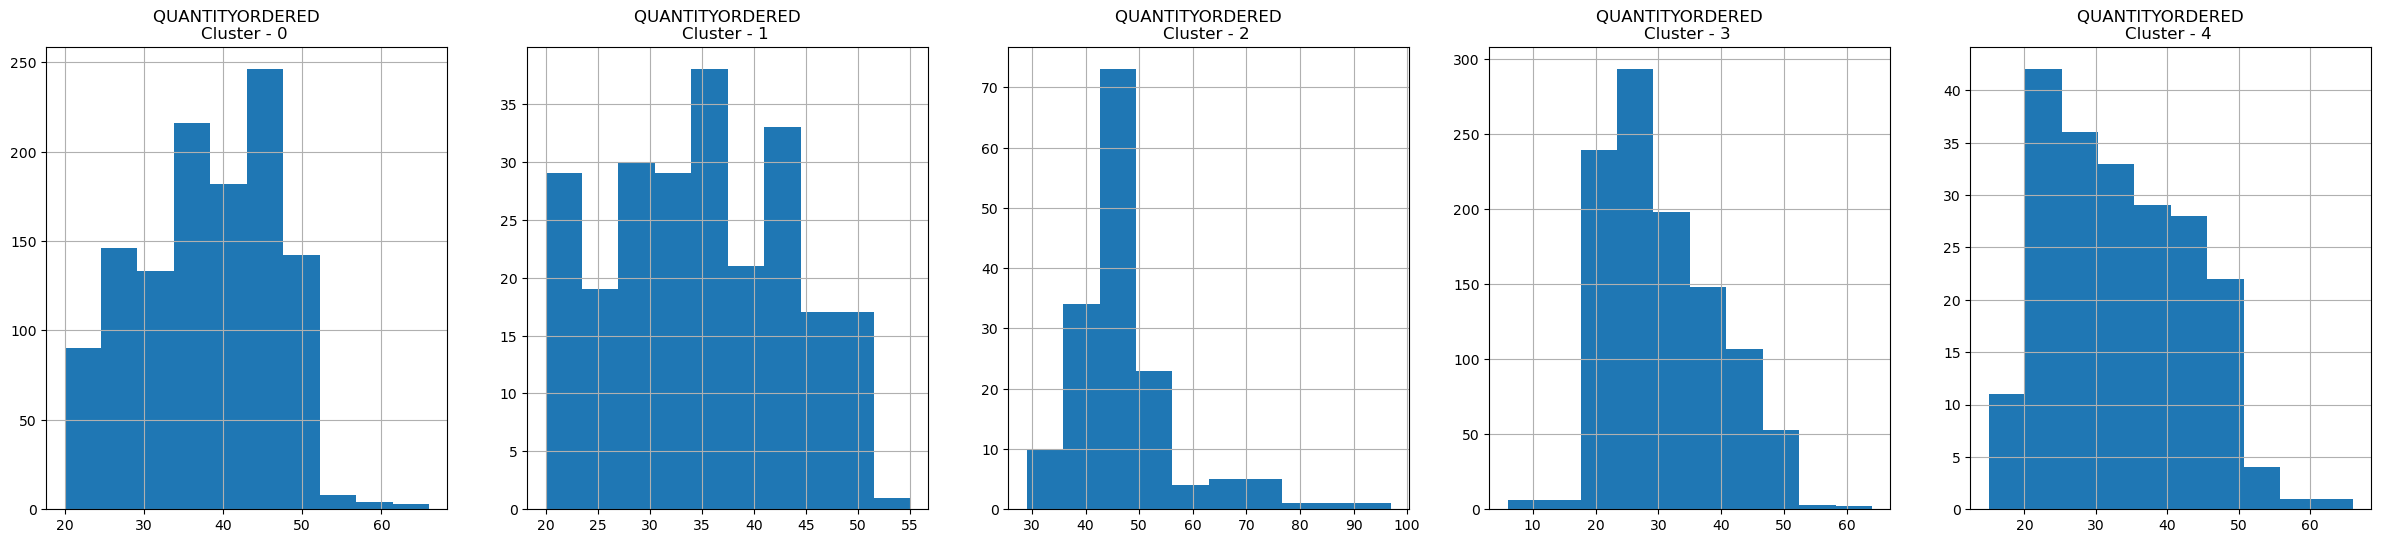

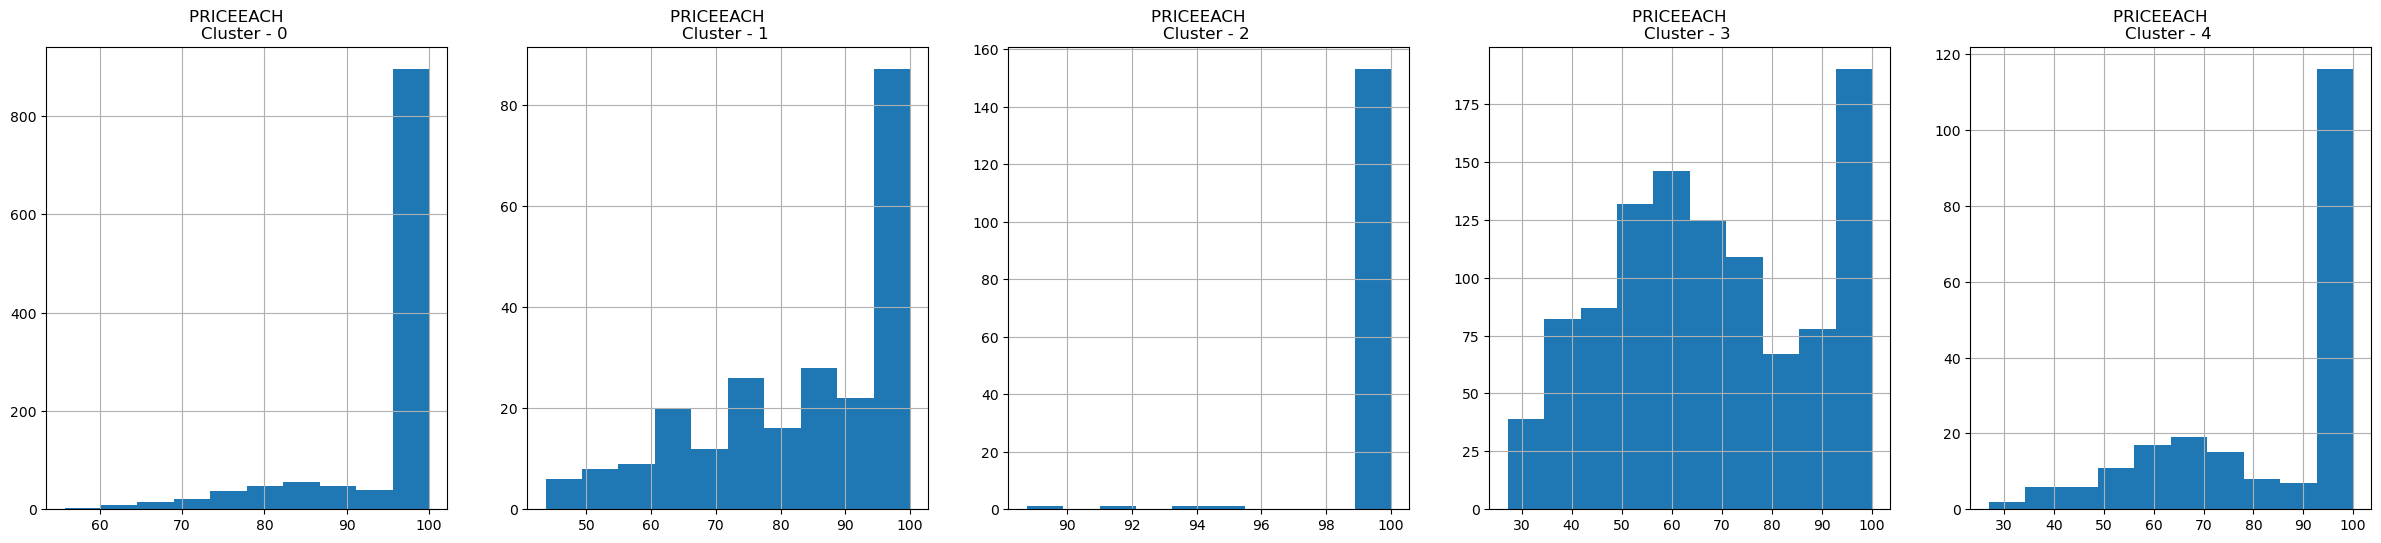

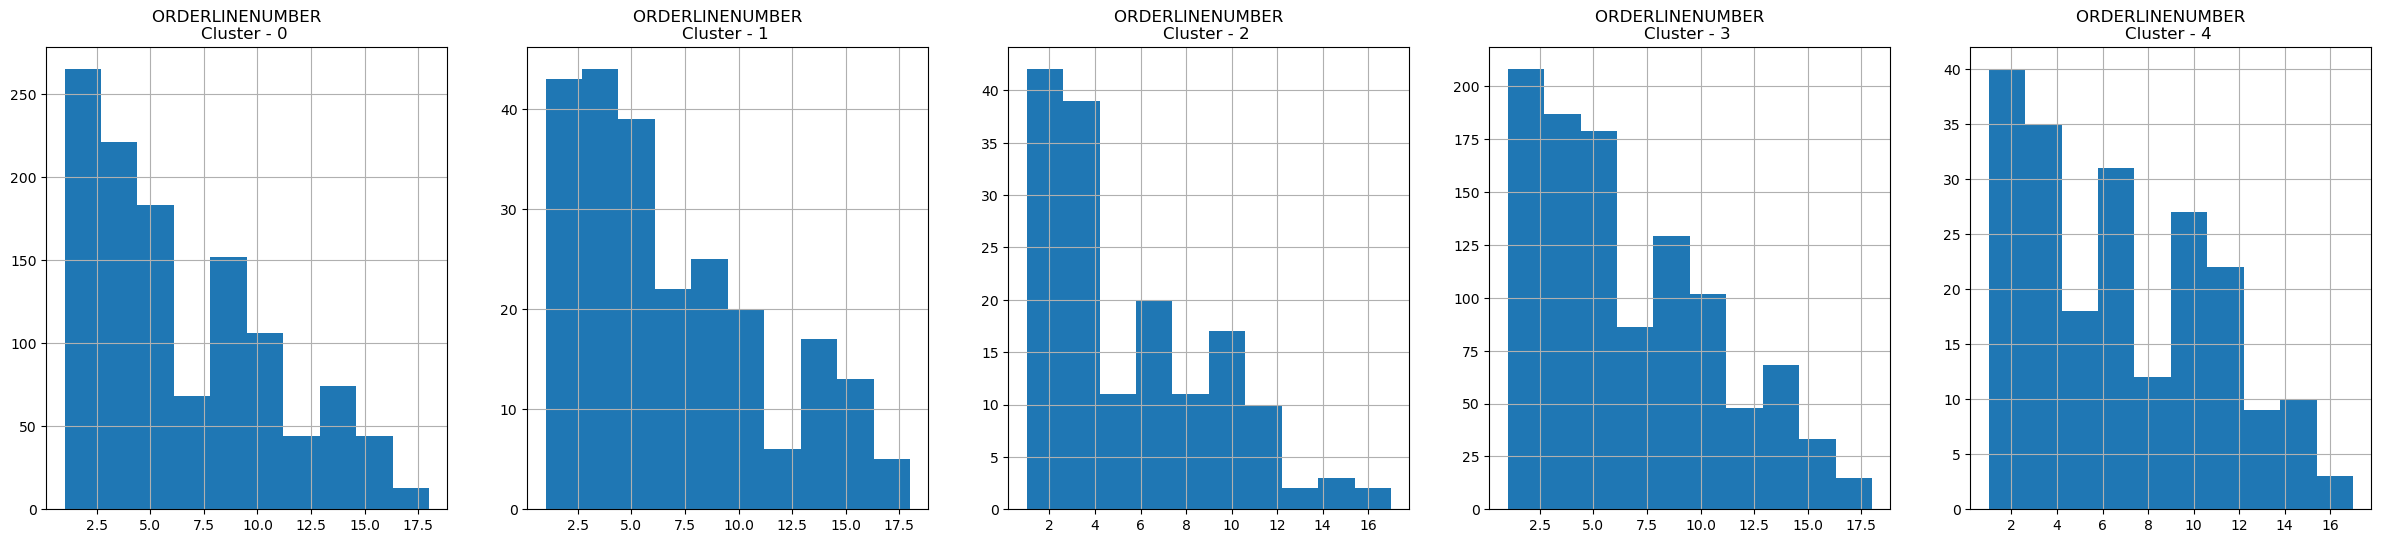

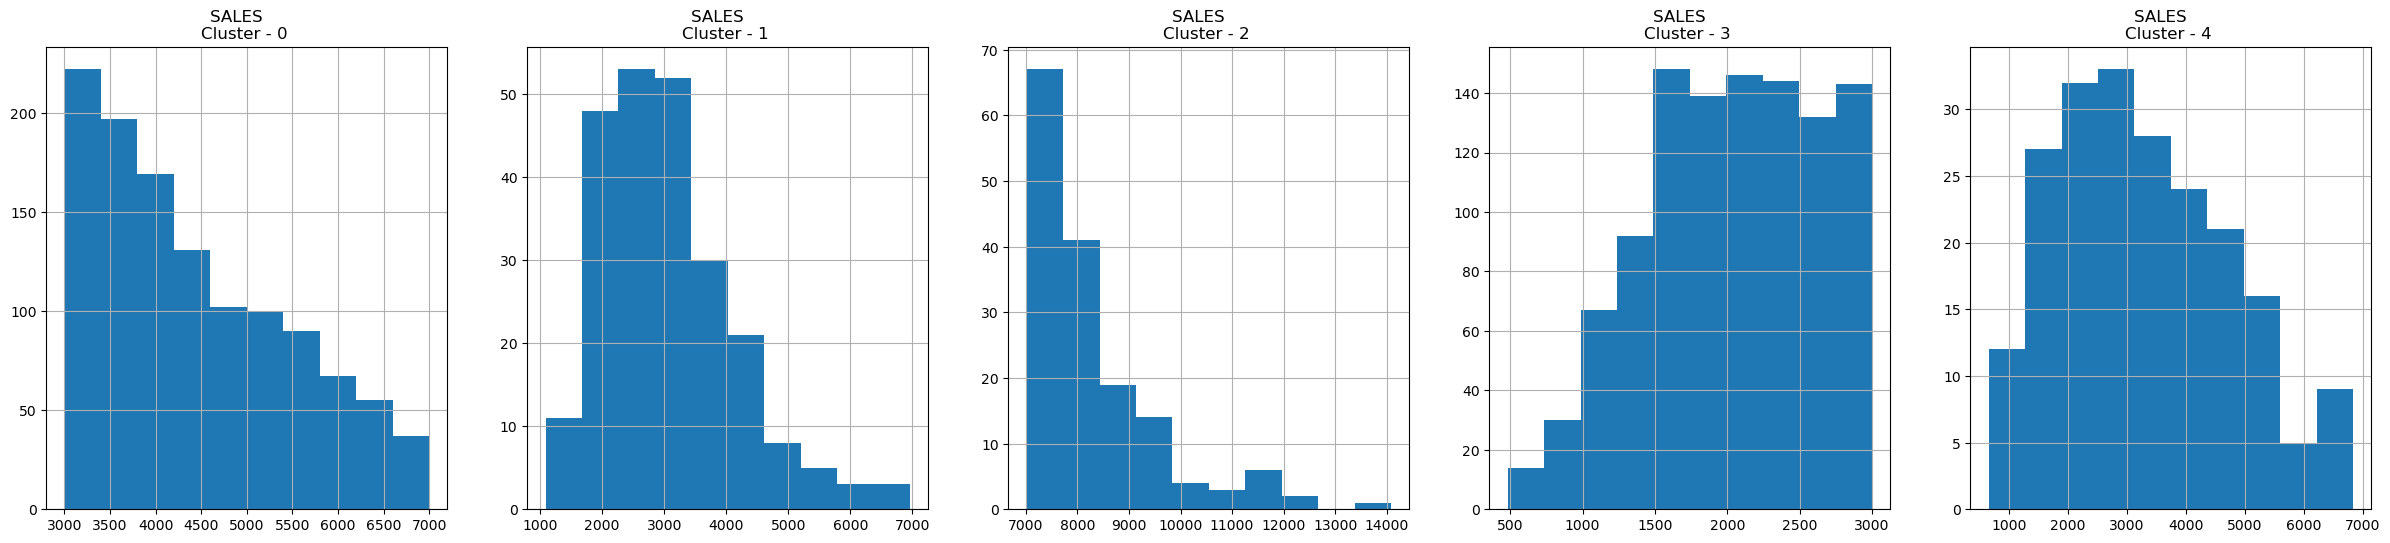

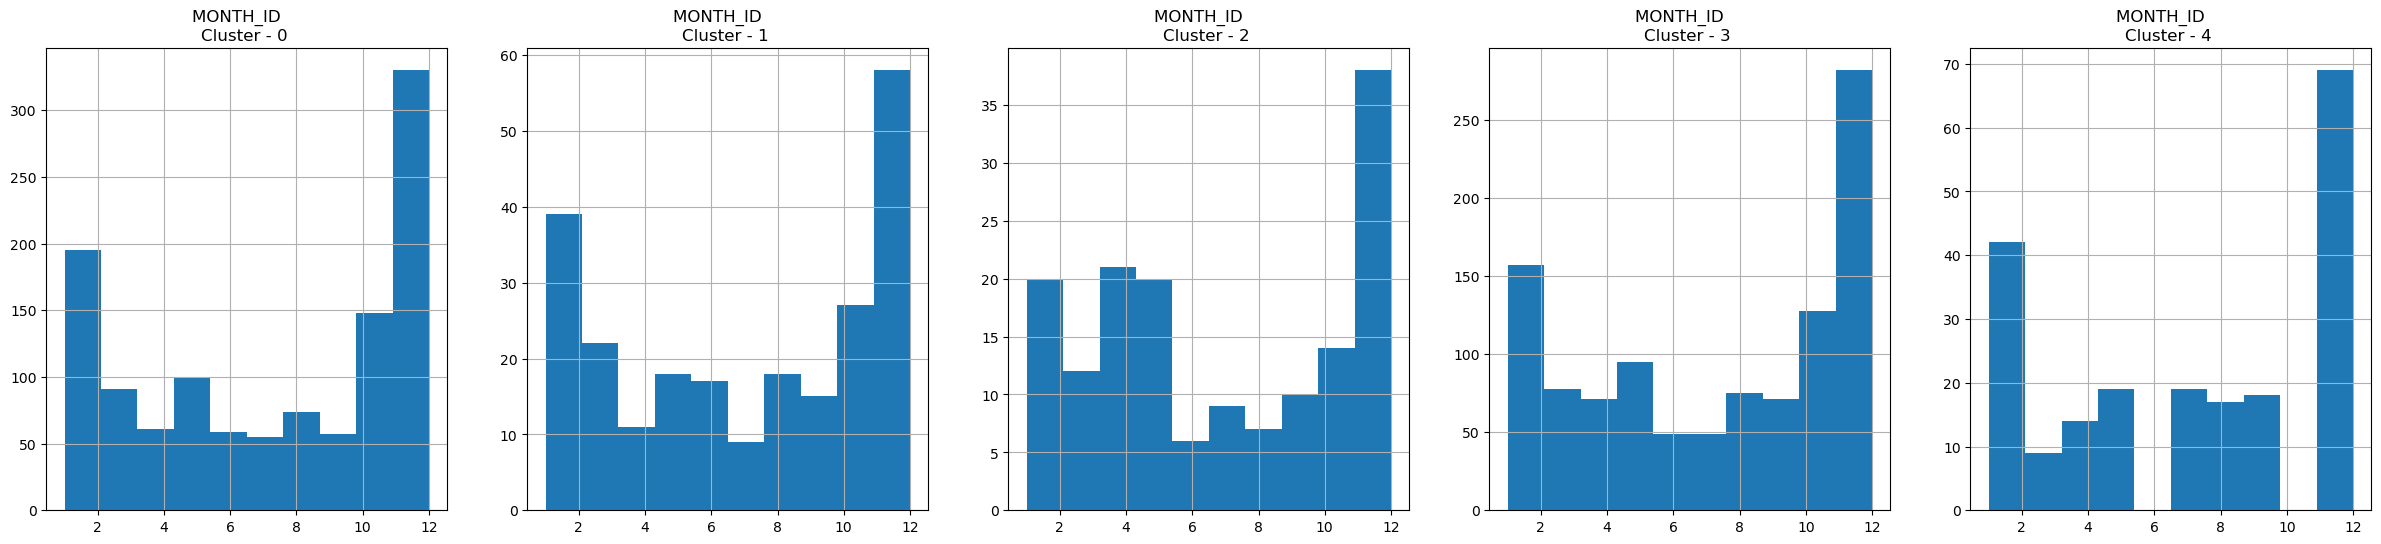

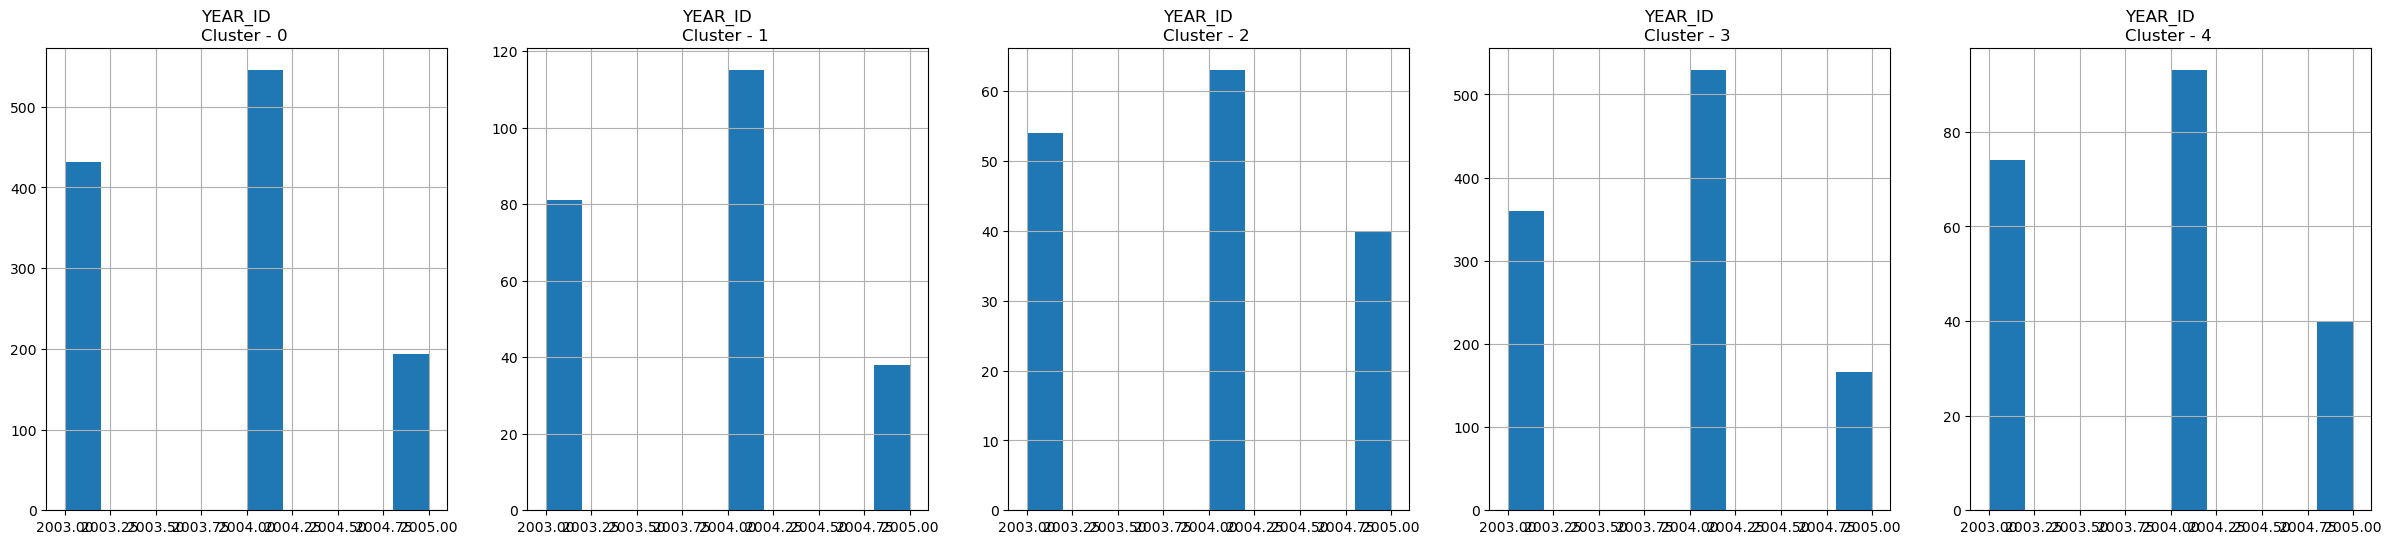

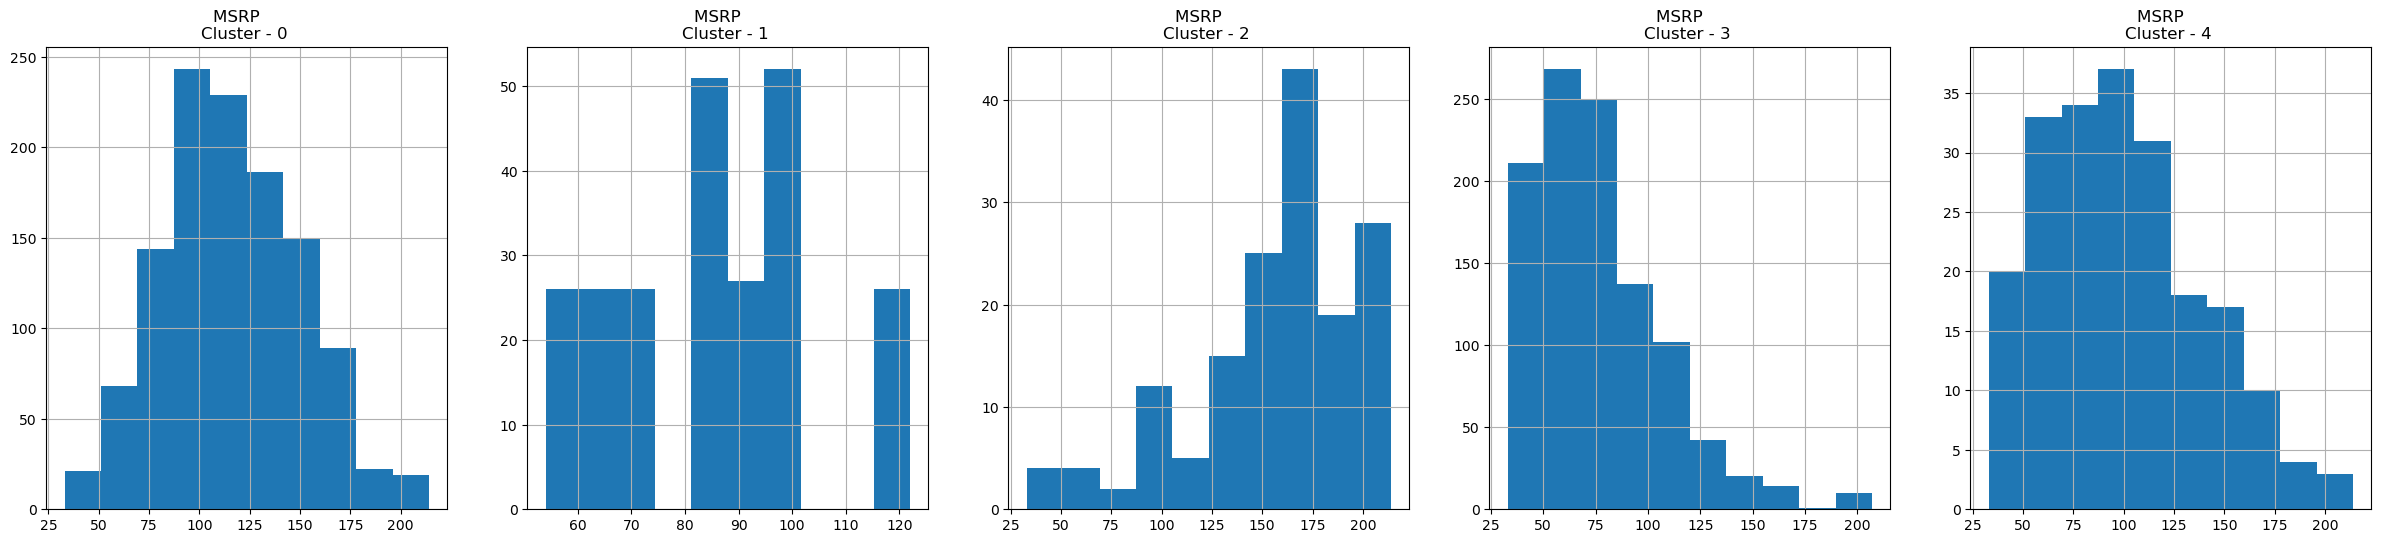

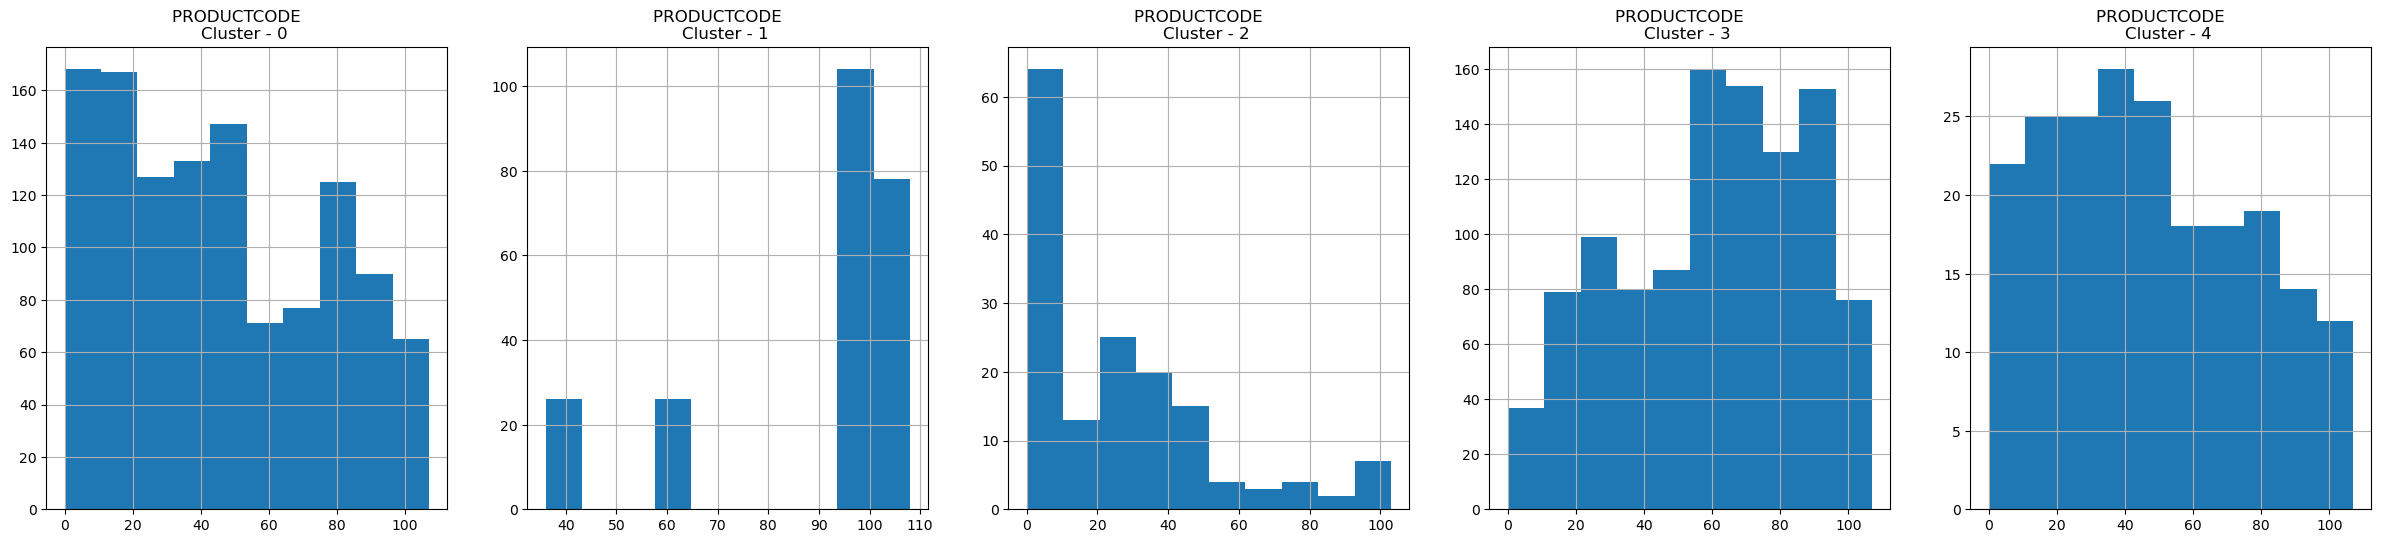

In [111]:
# Representar un histograma para cada característica según el clúster al que pertenece
for i in sales_df.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(5):
    plt.subplot(1, 5, j+1)
    cluster = sale_df_cluster[sale_df_cluster['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))

  plt.show()

## 8. PCA and RESULTS VISUALIZATION

In [112]:
# Reduce the original data to 3 dimensions using PCA to visualize the clusters

pca = PCA(n_components = 3)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.48628171, -1.20664716,  1.07858692],
       [-0.78449511, -1.03167559,  1.45566269],
       [ 1.43157059,  0.11661275,  0.30314704],
       ...,
       [ 0.38979927,  4.13907809, -0.06175824],
       [-2.78869347,  2.42246924,  1.56326331],
       [-0.70549575,  3.33134458, -0.53852643]])

In [113]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

pca1      pca2      pca3
0 -0.486282 -1.206647  1.078587
1 -0.784495 -1.031676  1.455663
2  1.431571  0.116613  0.303147
3  1.288384 -0.236822 -0.558146
4  1.976005 -0.158526 -1.056679

In [114]:
# Concatenate the cluster labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df

pca1      pca2      pca3  cluster
0    -0.486282 -1.206647  1.078587        3
1    -0.784495 -1.031676  1.455663        3
2     1.431571  0.116613  0.303147        0
3     1.288384 -0.236822 -0.558146        0
4     1.976005 -0.158526 -1.056679        0
...        ...       ...       ...      ...
2818 -2.450270  1.125021 -1.490596        1
2819 -0.158323  3.655735  0.880920        1
2820  0.389799  4.139078 -0.061758        1
2821 -2.788693  2.422469  1.563263        1
2822 -0.705496  3.331345 -0.538526        1

[2823 rows x 4 columns]

In [115]:
# Visualize clusters with 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color = 'cluster', symbol = 'cluster', size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

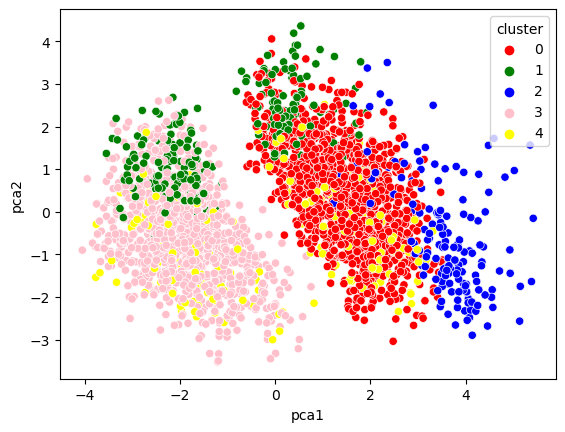

In [116]:
# Change the number of components to 2, modify the code and run the model again
# Visualize clusters using 2D graphics

pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(sales_df_scaled)

pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df, palette = ["red", "green", "blue", "pink", "yellow"])
plt.show()

# 9. APPLYING AUTOENCODERS

TO REDUCE THE DIMENSIONALYTY THROUGH AUTOENCODERS

In [120]:
sales_df.shape

(2823, 37)

In [118]:
# from keras.optimizers import SGD

# Glorot Uniform initializer: https://keras.rstudio.com/reference/initializer_glorot_uniform.html

input_df = Input(shape = (37,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(37, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder - utilizado para reducir la dimensión
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')

In [119]:
autoencoder.fit(sales_df_scaled, sales_df_scaled, batch_size = 128, epochs = 500, verbose = 3)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [122]:
autoencoder.save_weights('autoencoder_1.weights.h5')

In [123]:
pred = encoder.predict(sales_df_scaled)

89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [124]:
pred

array([[ 5.5723863,  2.6807332,  0.       , ...,  7.9317307,  3.2363389,
         0.824066 ],
       [ 7.479521 ,  3.8794749,  0.       , ...,  8.432219 ,  4.885755 ,
         1.5543799],
       [ 8.67826  ,  3.4891741,  0.       , ...,  9.756729 ,  4.1915855,
         3.5327494],
       ...,
       [ 7.127455 , 12.347587 ,  0.       , ...,  4.0599737,  1.7435207,
         6.8057547],
       [ 1.421093 ,  8.611913 ,  0.       , ...,  3.2427106,  2.3664527,
         1.4144824],
       [ 1.5799254,  9.612775 ,  0.       , ...,  2.7977357,  2.1984084,
         3.5425777]], dtype=float32)

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ramonestadella/anaconda3/lib/python3.

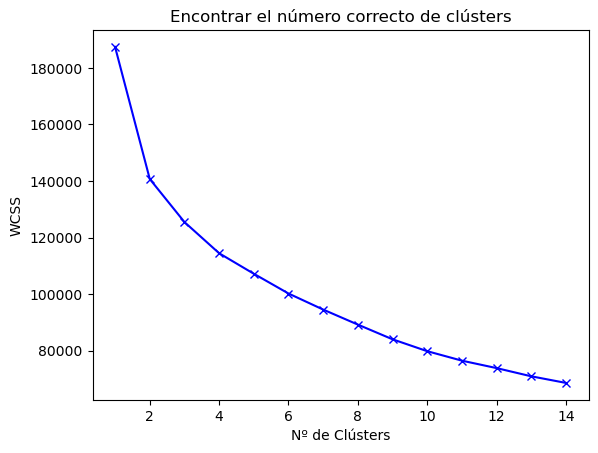

In [125]:
scores = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores.append(kmeans.inertia_)

plt.plot(range_values, scores, 'bx-')
plt.title('Encontrar el número correcto de clústers')
plt.xlabel('Nº de Clústers')
plt.ylabel('WCSS')
plt.show()

In [126]:
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(sales_df_scaled)

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [127]:
df_cluster_dr = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  MONTH_ID  YEAR_ID  \
0               30      95.70              2.0  2871.00         2     2003   
1               34      81.35              5.0  2765.90         5     2003   
2               41      94.74              2.0  3884.34         7     2003   
3               45      83.26              6.0  3746.70         8     2003   
4               49     100.00             14.0  5205.27        10     2003   

   MSRP  PRODUCTCODE  Australia  Austria  ...  Motorcycles  Planes  Ships  \
0    95            0          0        0  ...            1       0      0   
1    95            0          0        0  ...            1       0      0   
2    95            0          0        0  ...            1       0      0   
3    95            0          0        0  ...            1       0      0   
4    95            0          0        0  ...            1       0      0   

   Trains  Trucks and Buses  Vintage Cars  Large  Medium  Small  cluster  
0       0                 0             0      0       0      1        0  
1       0                 0             0      0       0      1        0  
2       0                 0             0      0       1      0        0  
3       0                 0             0      0       1      0        0  
4       0                 0             0      0       1      0        0  

[5 rows x 38 columns]

In [128]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])
cluster_centers

QUANTITYORDERED PRICEEACH ORDERLINENUMBER     SALES  MONTH_ID   YEAR_ID  \
0        0.441855  0.503532       -0.030254  0.370424 -0.035278  0.049366   
1        0.290590  0.741988       -0.045095  1.100310  0.031257 -0.047229   
2       -0.467425 -0.734849        0.044405 -0.813453  0.010520 -0.013004   

       MSRP PRODUCTCODE Australia   Austria  ... Classic Cars Motorcycles  \
0  0.039478    0.118163  0.017313 -0.063247  ...    -0.522634    0.122994   
1  1.178308   -0.792740 -0.077016  0.137314  ...     1.145639   -0.219995   
2 -0.608847    0.303360  0.025189 -0.021136  ...    -0.180052    0.017957   

     Planes     Ships    Trains Trucks and Buses Vintage Cars     Large  \
0  0.093577  0.116205  0.003997         0.263566     0.159003 -0.237985   
1 -0.297124 -0.300637 -0.157615        -0.309123    -0.429753  0.848193   
2  0.077512  0.062627  0.074630        -0.041394     0.094743 -0.242672   

     Medium     Small  
0  1.017528 -0.912100  
1  0.474701 -0.867039  
2 -0.980703  1.096370  

[3 rows x 37 columns]

In [129]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers

QUANTITYORDERED  PRICEEACH ORDERLINENUMBER        SALES  MONTH_ID  \
0       39.396348  93.815134        6.338346  4236.038872  6.963480   
1       37.923077  98.624968        6.275641  5580.152500  7.206731   
2       30.540221  68.836120        6.653785  2055.884464  7.130915   

       YEAR_ID        MSRP PRODUCTCODE Australia   Austria  ... Classic Cars  \
0  2003.849624  102.301826   57.504834  0.069817  0.010741  ...     0.094522   
1  2003.782051  148.060897   28.738782  0.046474  0.038462  ...     0.886218   
2  2003.805994   76.251577   63.353312  0.071767  0.016562  ...     0.257098   

  Motorcycles    Planes         Ships    Trains Trucks and Buses Vintage Cars  \
0    0.156821  0.137487  1.149302e-01  0.027927         0.187970     0.280344   
1    0.046474  0.016026  3.885781e-16  0.001603         0.011218     0.038462   
2    0.123028  0.132492  1.001577e-01  0.039432         0.093849     0.253943   

          Large        Medium         Small  
0  1.074114e-03  9.989259e-01 -4.996004e-16  
1  2.500000e-01  7.275641e-01  2.243590e-02  
2  1.595946e-16 -9.436896e-16  1.000000e+00  

[3 rows x 37 columns]

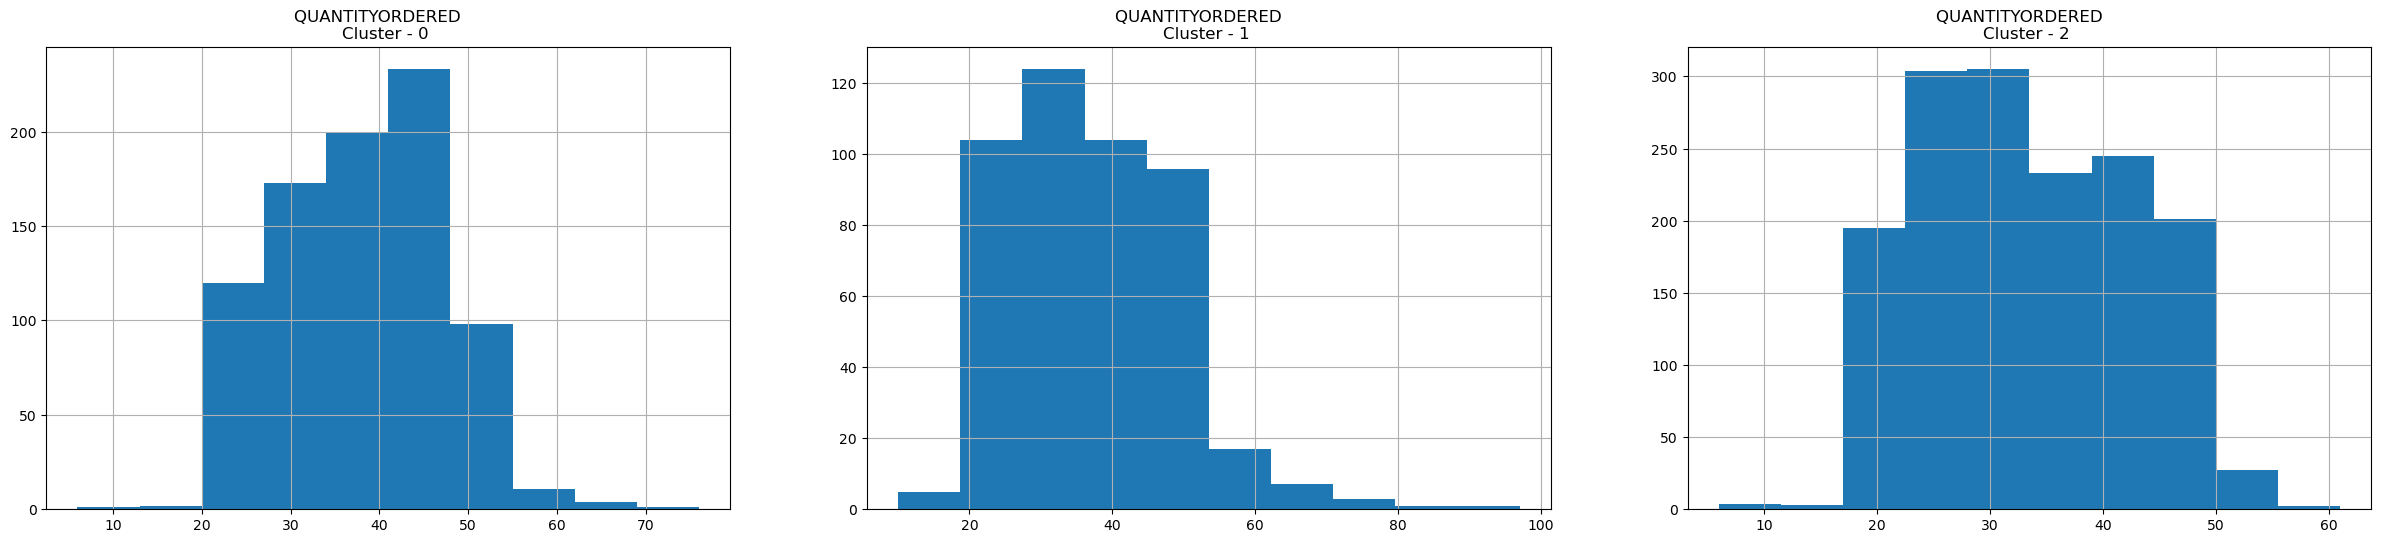

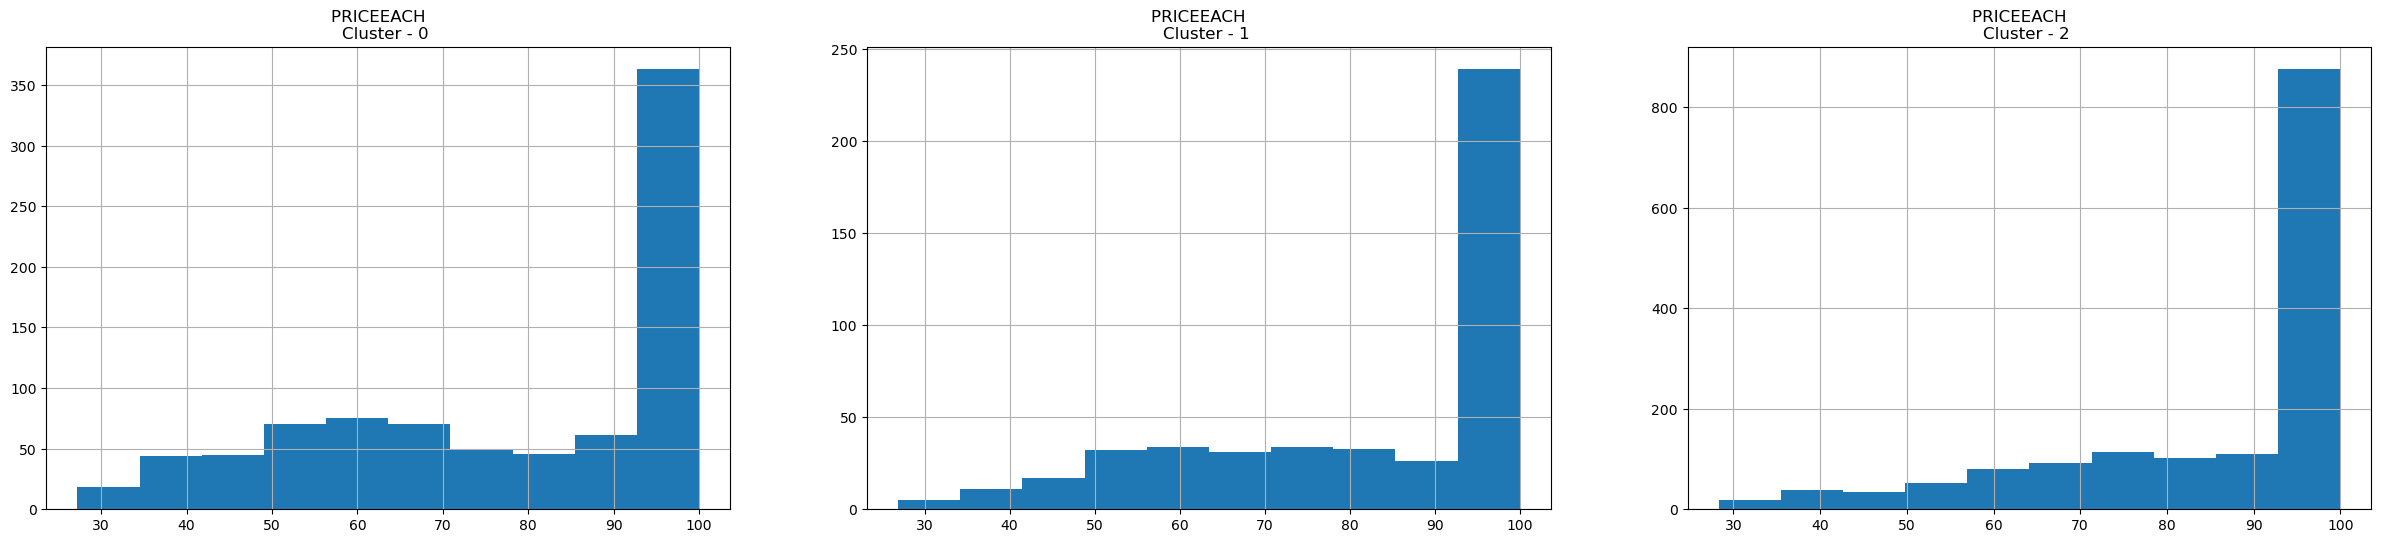

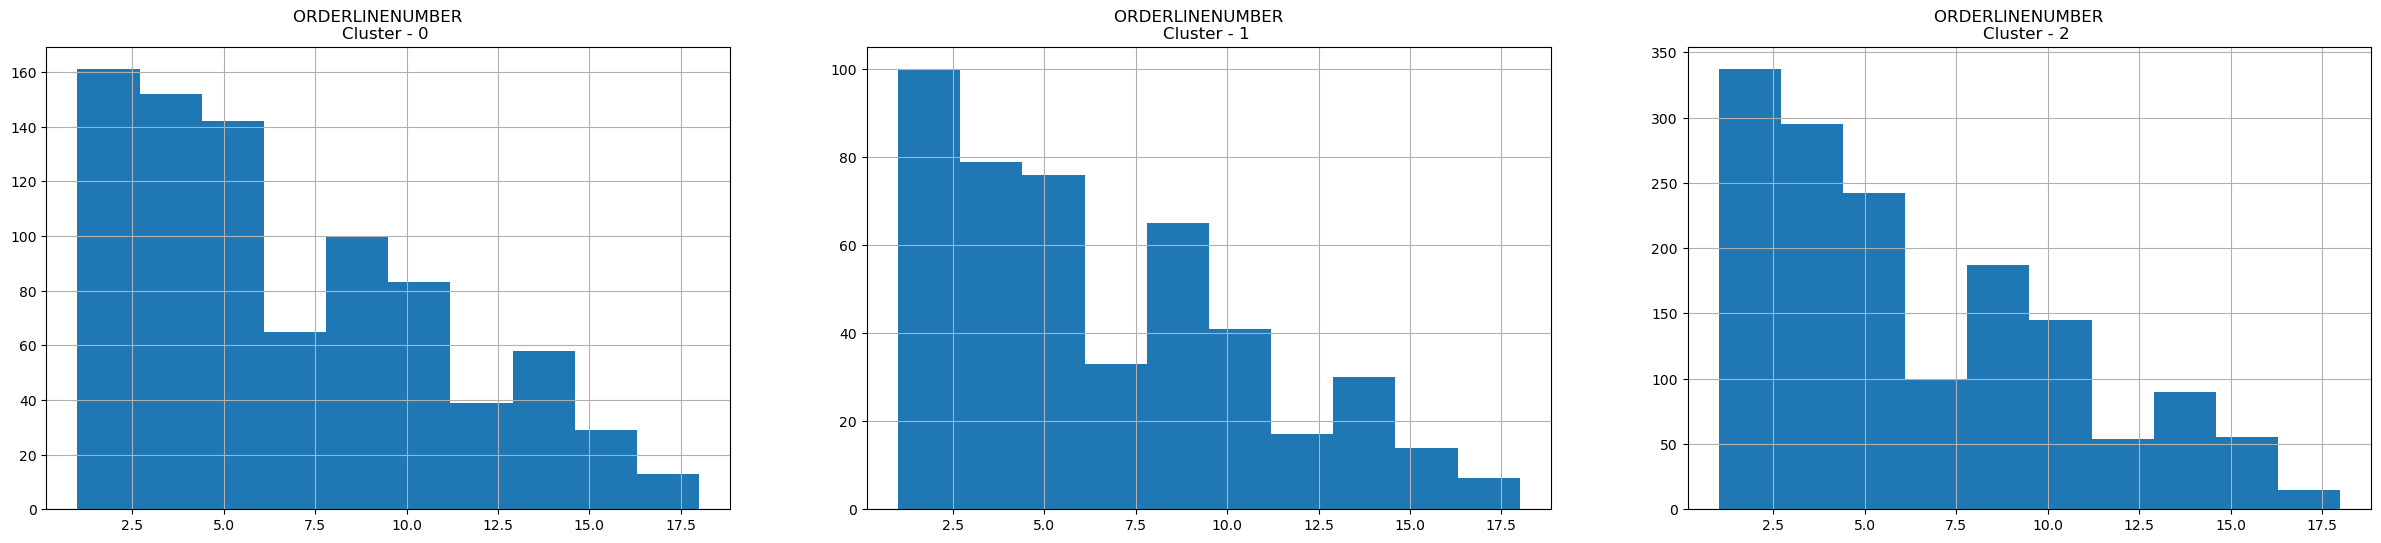

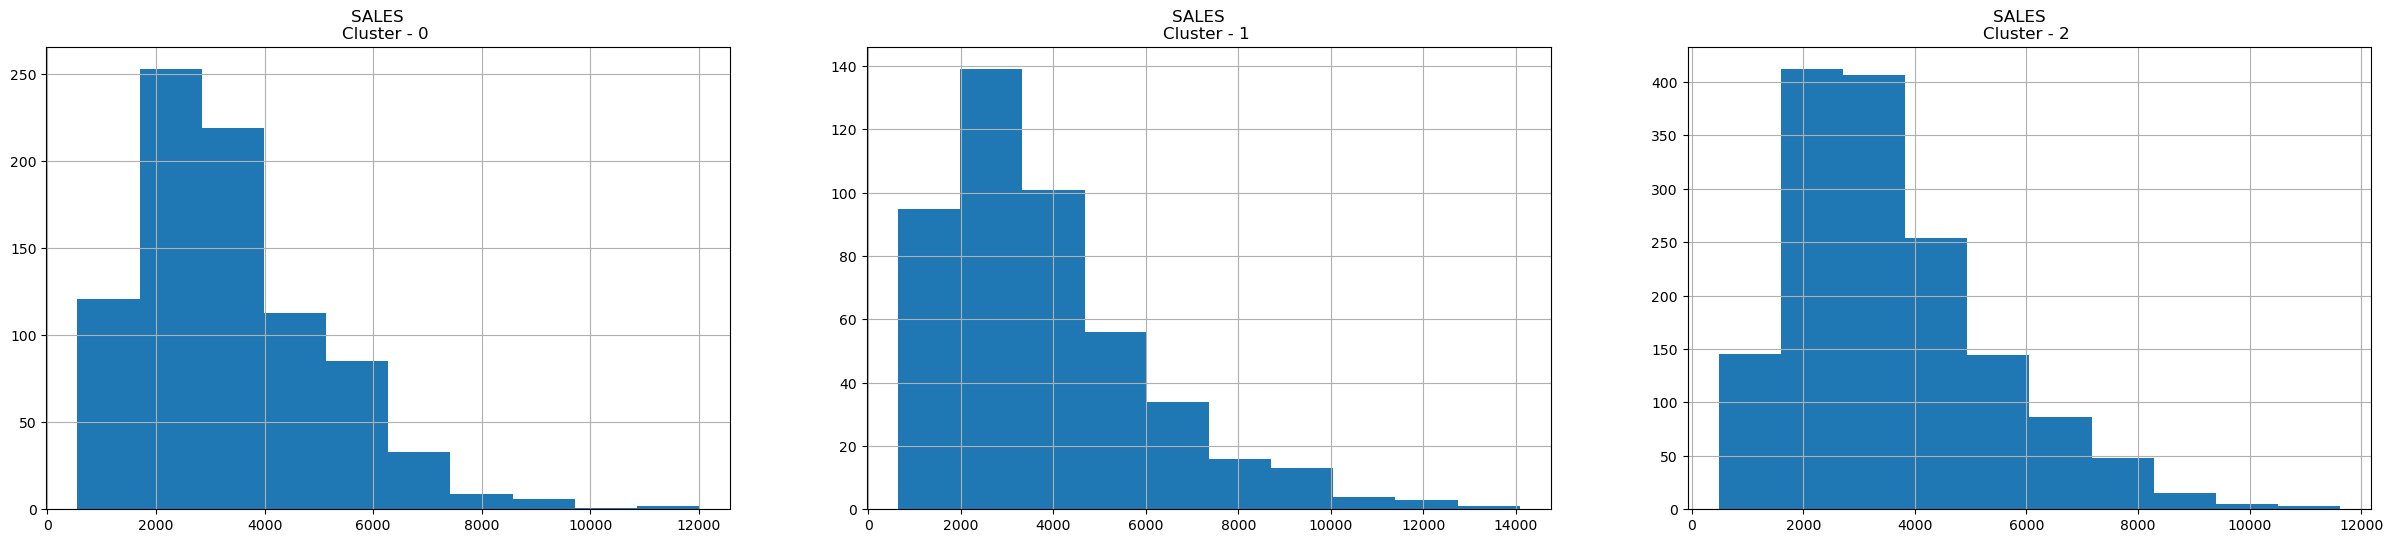

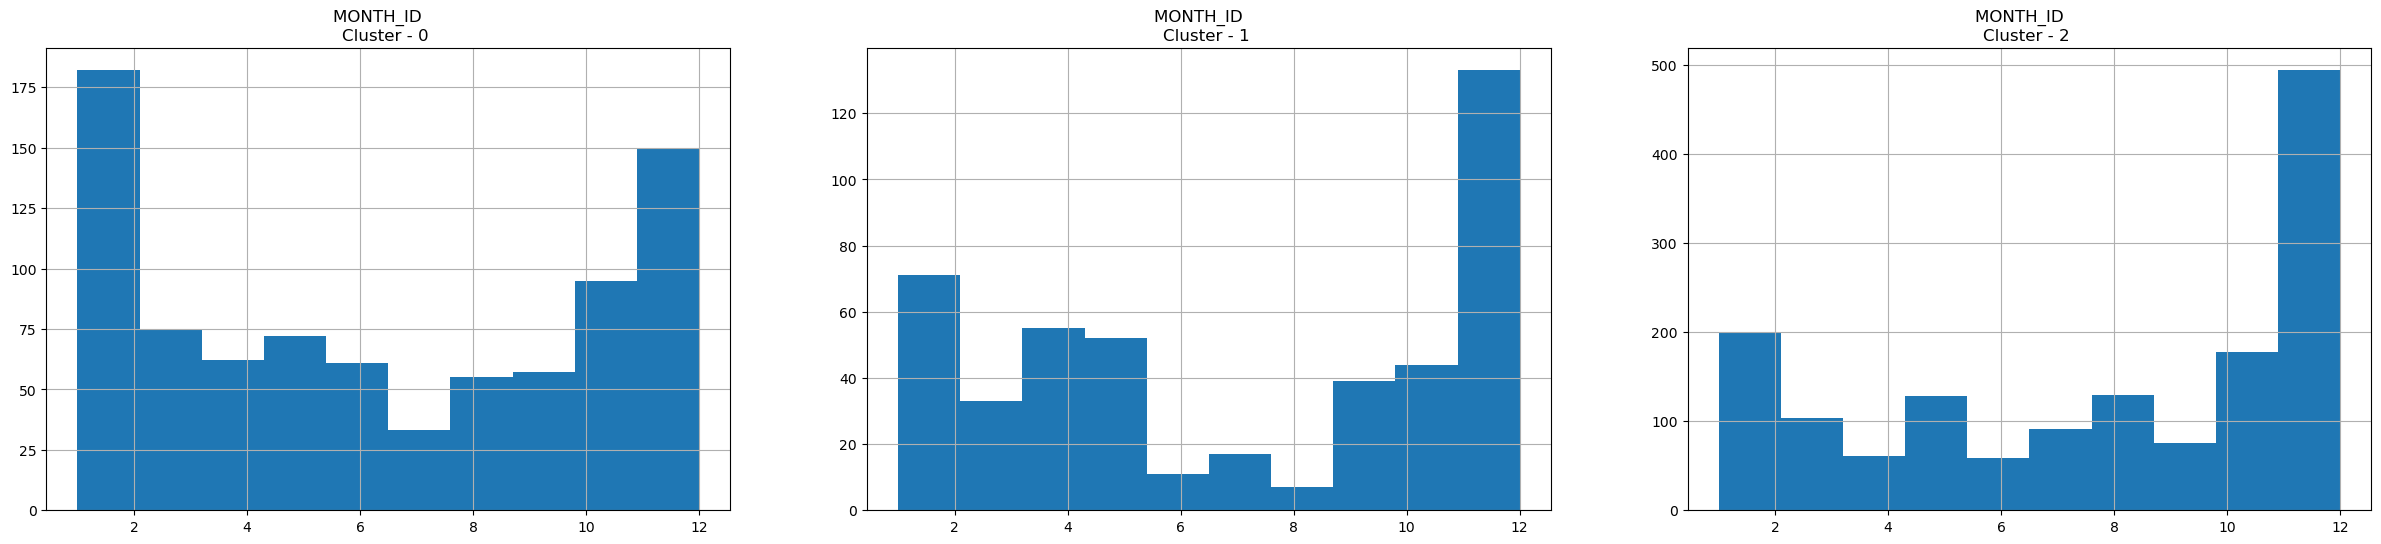

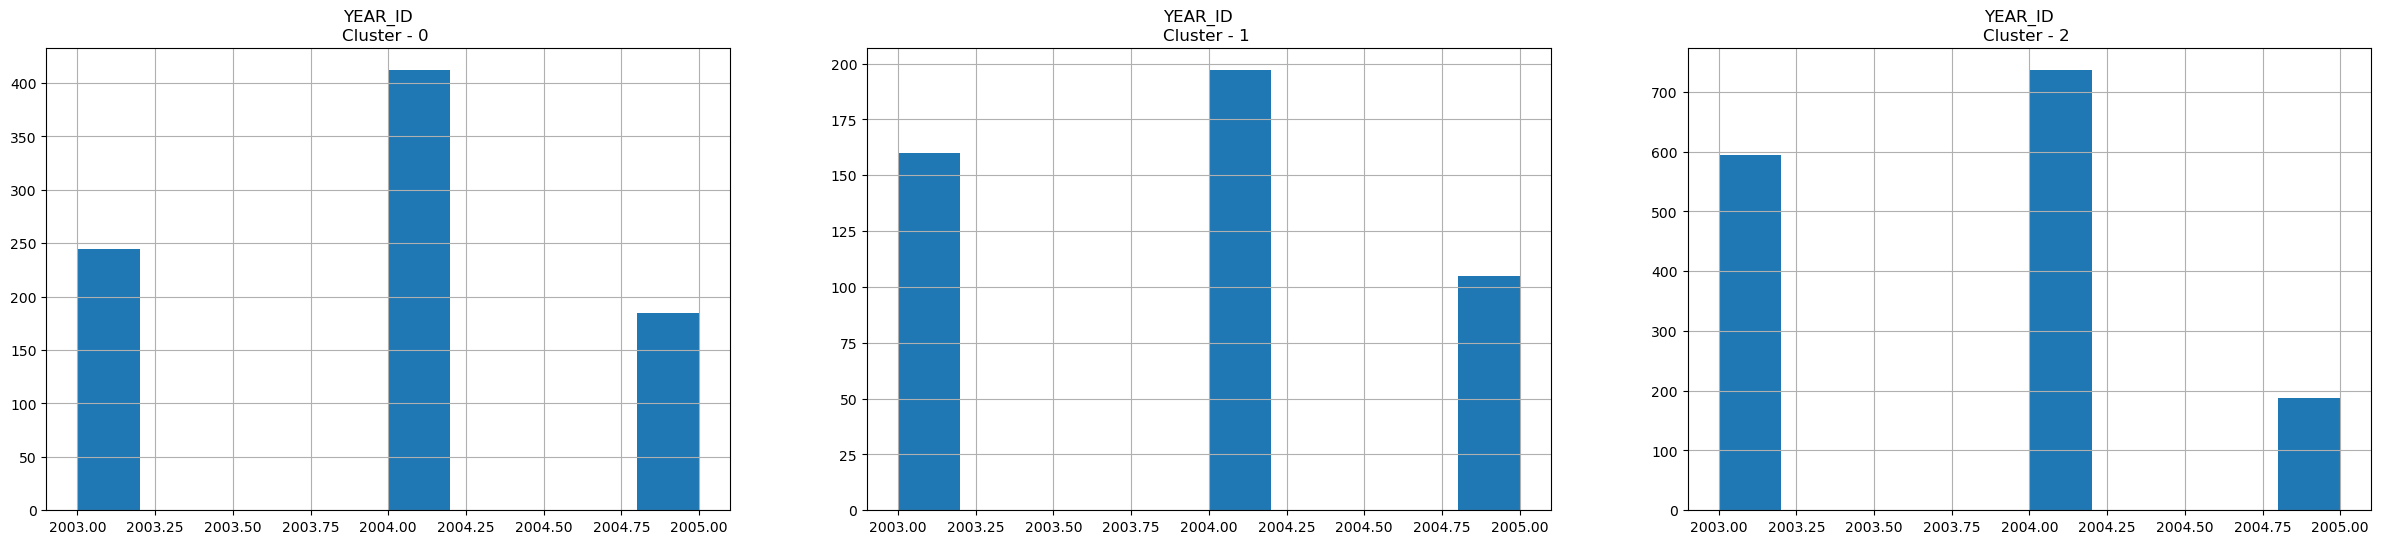

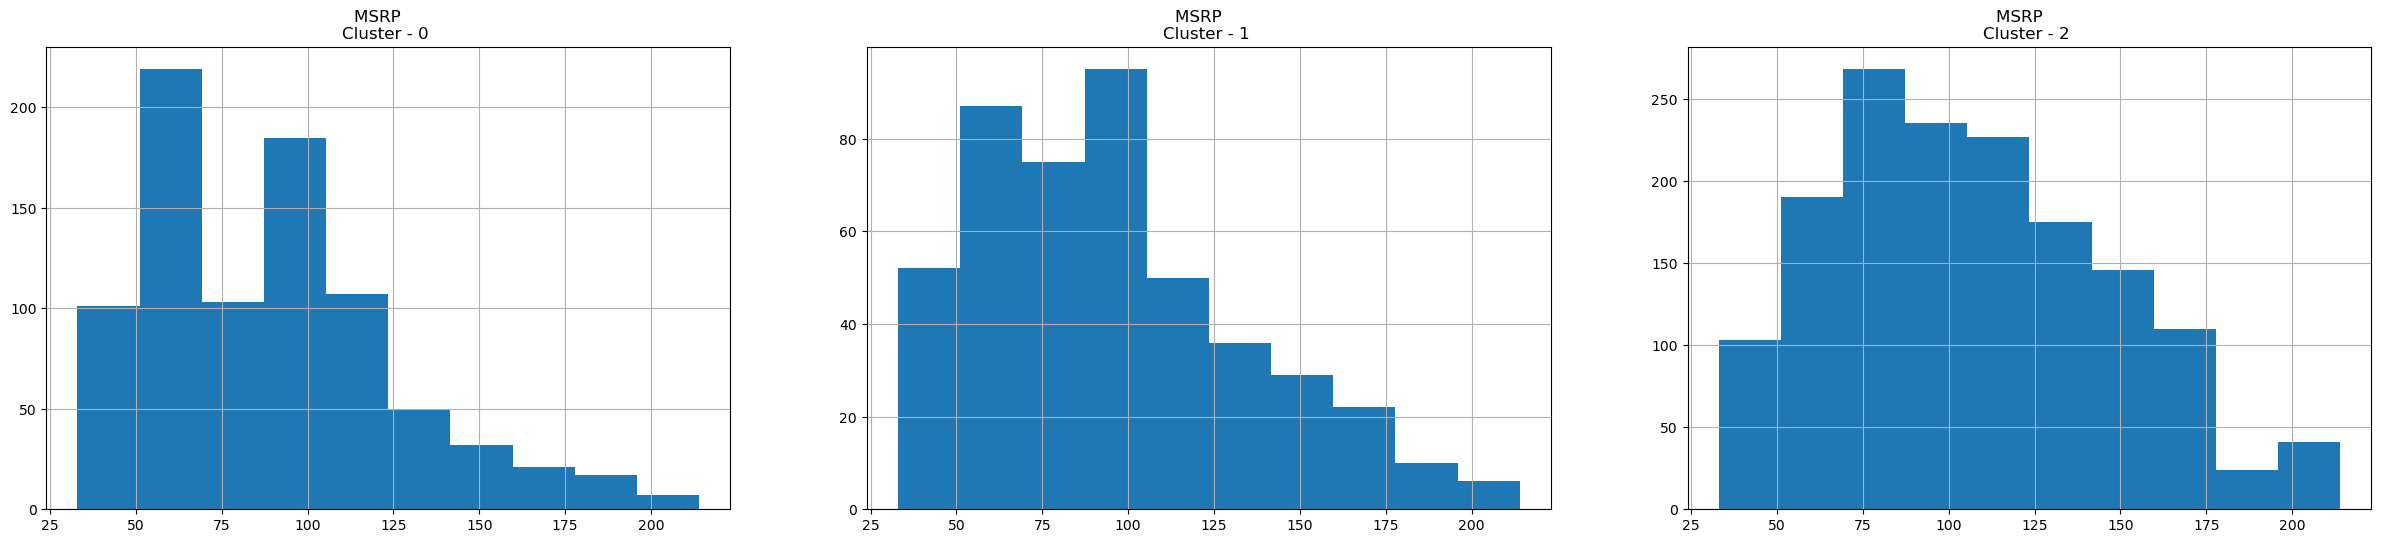

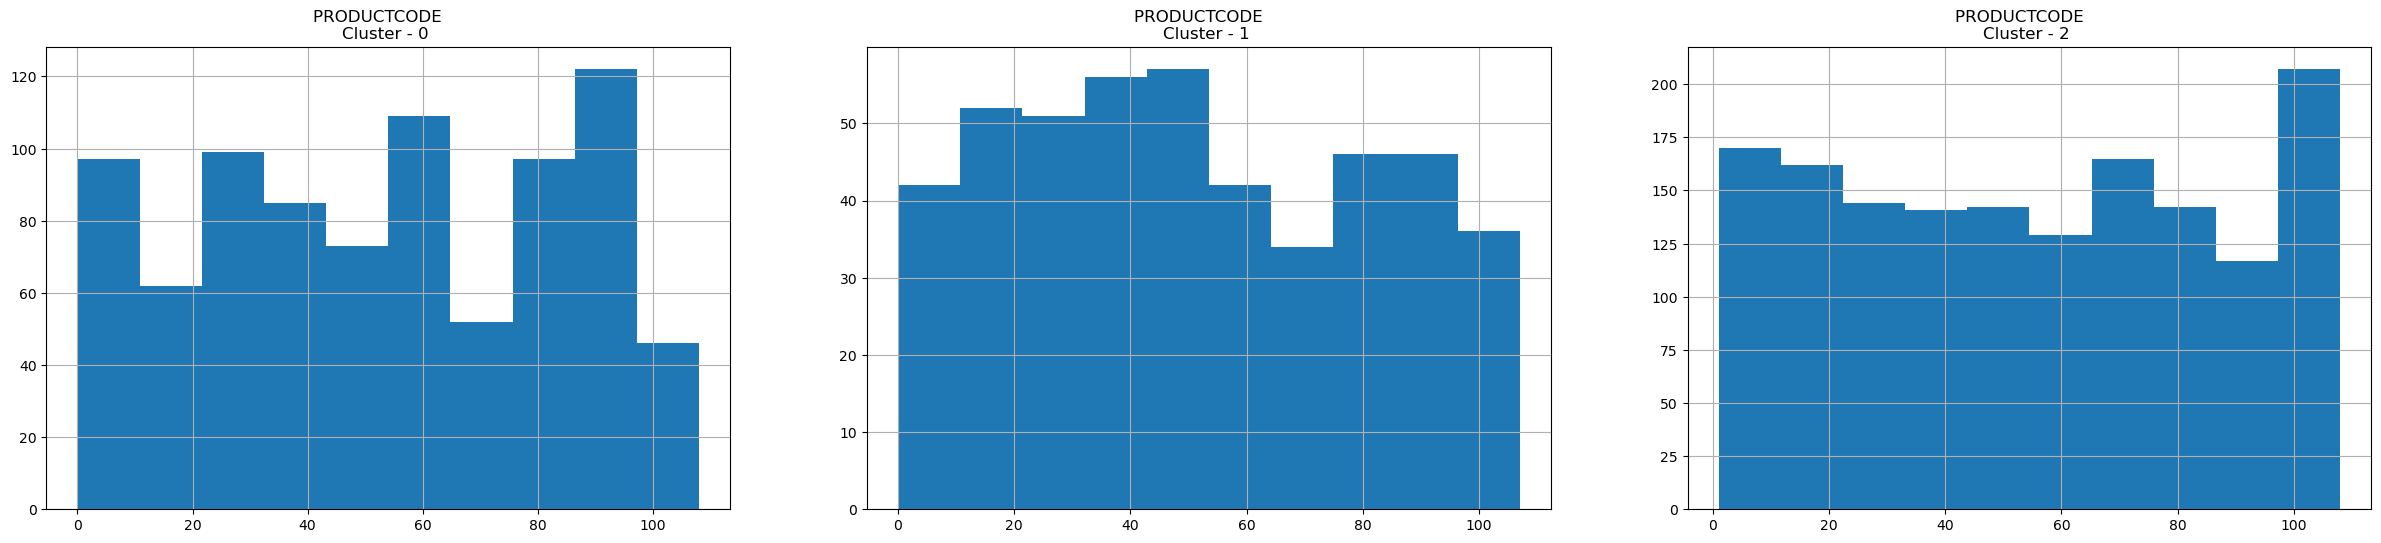

In [130]:
# plot histogram for each feature based on cluster
for i in sales_df.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(3):
    plt.subplot(1, 3, j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))

  plt.show()

- Cluster 0: This group represents customers who purchase items in large quantities (47), usually purchasing items with high prices (99). They bring in more sales than other groups. They are mostly active throughout the year. They usually buy products corresponding to the product code 10-90. They buy products with a high mrsp (158).
- Cluster 1: This group represents customers who purchase items in average quantity (37) and who tend to purchase high-priced items (95). They contribute an average of sales (4398) and are active all year round, they are the largest buyers of products corresponding to product codes 0-10 and 90-100, and they also prefer to buy products with a high RRP (115).
- Cluster 2: This group represents customers who buy items in small quantities (30), tend to buy low-priced items (69). They correspond to the lowest total sale (2061) and are active throughout the year. They are the largest buyers of products corresponding to product codes 0-20 and 100-110 and then purchase products with low RRP (77).

In [131]:
# Reduce the original data to 3 dimensions using PCA to visualize the clusters

pca = PCA(n_components = 3)
prin_comp = pca.fit_transform(sales_df_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

pca1      pca2      pca3
0 -0.486367 -1.208563  1.036985
1 -0.784708 -1.051844  1.458994
2  1.431454  0.111845  0.313195
3  1.288448 -0.230068 -0.564014
4  1.976024 -0.169563 -1.037545

In [132]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2      pca3  cluster
0 -0.486367 -1.208563  1.036985        0
1 -0.784708 -1.051844  1.458994        0
2  1.431454  0.111845  0.313195        0
3  1.288448 -0.230068 -0.564014        0
4  1.976024 -0.169563 -1.037545        0

In [133]:
# Visualize clusters using 3D-Scatterplot

fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color='cluster', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))